<div style="text-align: center;">
    <img src="images/Marca Leandra Jaramillo.png" alt="Logo personal" style="width:25%;">
</div>

# **Social Impact Scoring: Medición del impacto social de créditos para la inclusión y reducción de desigualdades a través de un algoritmo de Machine learning**

## **¿Qué es el Social Impact Scoring?**

_El Social Impact Scoring_ es un algoritmo de Machine Learning desarrollado para el Datatón: **Exprésate Perú con Datos 2024.** Su objetivo es proporcionar una herramienta que visibilice el impacto social del programa MiVIVIENDA en la inclusión social y la reducción de desigualdades. Inspirado en el _credit scoring_ tradicional, utilizado para evaluar la solvencia crediticia, el **Social Impact Scoring (SIS)** adopta un enfoque distinto al centrarse en medir y visibilizar cuantitativamente el impacto social. Su propósito es evaluar cómo el acceso a créditos para vivienda, especialmente para aquellos que tradicionalmente enfrentan mayores dificultades para obtenerlos, contribuye a la inclusión social.

El algoritmo permitirá a instituciones públicas, privadas y programas sociales evaluar de manera precisa cómo los créditos otorgados están contribuyendo a la inclusión social y a la reducción de brechas económicas. Al ofrecer una medición cuantitativa del impacto, el Social Impact Scoring se convierte en una herramienta clave para identificar áreas que requieren nuevas estrategias sociales, dirigidas a poblaciones con menos oportunidades y mayores necesidades.

El proyecto se estructura en cuatro partes principales:

**1. Exploración Inicial, limpieza y transformación de los datos.**

**2. Análisis y visualización exploratoria de datos.** 

**3. Evaluación del Impacto Social mediante Modelado Predictivo.**

**4. Conclusiones y recomendaciones.** 

## **Pregunta central de Investigación**

_¿Cómo pueden los datos de los créditos otorgados a través del Fondo MIVIVIENDA contribuir a medir el impacto social en la reducción de desigualdades, en línea con la **meta 10.2 del ODS 10**, que busca facilitar el acceso a recursos para personas que viven por debajo de la mediana de ingresos? ¿De qué manera el desarrollo de un algoritmo puede apoyar la toma de decisiones para fortalecer la inclusión social y económica de los grupos más vulnerables?_ 

## **Hipótesis central del proyecto**

El desarrollo de un algoritmo que considere variables clave permitirá identificar a los grupos más vulnerables y maximizar el impacto social de los créditos otorgados. En línea con la meta 10.2 del ODS 10, se espera que los créditos dirigidos a personas con condiciones laborales independientes, ingresos por debajo de la mediana y tasas de interés más bajas generen un Social Impact Score más alto, contribuyendo a la reducción de las desigualdades sociales y promoviendo la inclusión social y económica, independientemente de su género, raza, estado civil u otras características que no deberían influir en su acceso a oportunidades.

## **Objetivo General**

Desarrollar un algoritmo que permita medir el impacto social de los créditos otorgados por el programa Fondo MIVIVIENDA y que se convierta en una herramienta complementaria para visibilizar cómo estos créditos contribuyen a la inclusión social y económica de los grupos vulnerables, en alineación con la **meta 10.2 del ODS 10:** reducir las desigualdades promoviendo la inclusión de todas las personas, independientemente de su condición socioeconómica.

## **Origen del dataset:** 

**Créditos por enfoque de género**
Economía y Finanzas

"El dataset incluye información sobre las colocaciones de los créditos otorgados por el Fondo MiVivienda por enfoque de género. La información publicada corresponde a las colocaciones de los créditos MIVIVIENDA por enfoque de género otorgados por el FMV. En cumplimiento de su objeto social de promoción y financiamiento de la adquisición, mejoramiento y construcción de viviendas, especialmente las de interés social.
  
El registro contiene datos como la fecha de desembolso del crédito, codificación anonimizada del beneficiario, género, ubicación del proyecto, estado civil, condición laboral, institución financiera intermediaria, ingreso, edad, tasa de interés, plazo del crédito, monto del crédito y valor de la vivienda." 

**Fuente:** https://expresateperu.datosabiertos.gob.pe/dataset/cr%C3%A9ditos-por-enfoque-de-g%C3%A9nero 

**Institución que provee el dataset**: Fondo Mi Vivienda S.A. **Cobertura de los datos: 2014-2024**

**El Fondo MiVivienda S.A.** es una institución pública peruana creada en 1998, con el objetivo principal de facilitar el acceso a viviendas adecuadas, especialmente para familias de ingresos bajos y medios. Este fondo opera como un banco hipotecario, proporcionando financiamiento a través de créditos hipotecarios que son gestionados por entidades financieras privadas.

## **Primera parte: Exploración inicial, limpieza y transformación de los datos**

En esta sección del proyecto se importan las librerías y herramientas necesarias para el desarrollo del análisis. Se procede a cargar el dataset y realizar una exploración inicial para comprender las características principales de los datos, identificar posibles valores nulos o inconsistencias, y realizar las transformaciones necesarias; de esta manera se garantiza que los datos estén en óptimas condiciones para el modelado posterior.

In [149]:
# Importar las herramientas y librerías necesarias
# Manipulación de datos
import pandas as pd
import numpy as np

# Limpieza y transformación de los datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pruebas estadísticas
from scipy import stats
from scipy.stats import median_test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

# Algoritmos y modelado
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Control de advertencias
import warnings
warnings.filterwarnings('ignore')

### Exploración y limpieza inicial del Dataset

In [150]:
# Carga del dataset
archivo = 'C:\\Users\\Leandra\\Datathon\\Creditos_Enfoque_Genero.csv'
try:
    df = pd.read_csv(archivo, encoding='utf-8', delimiter=';')
except UnicodeDecodeError:
    df = pd.read_csv(archivo, encoding='ISO-8859-1', delimiter=';')

In [151]:
# Visualización de las dimensiones del Dataset
df.shape

(105853, 18)

In [152]:
# Visualización del nombre de las columnas que contiene el Data Set
df.columns

Index(['FECHA_CREDITO', 'ID', 'GENERO', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'ESTADO_CIVIL', 'CONDICION_LABORAL', 'TIPO_IFI', 'IFI',
       'INGRESO_FAMILIAR', 'EDAD', 'TASA', 'PLAZOS', 'PRESTAMO', 'VIVIENDA',
       'FECHA_CORTE'],
      dtype='object')

In [153]:
# Visualización primeras 5 filas del dataset
df.head()

,FECHA_CREDITO,ID,GENERO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,ESTADO_CIVIL,CONDICION_LABORAL,TIPO_IFI,IFI,INGRESO_FAMILIAR,EDAD,TASA,PLAZOS,PRESTAMO,VIVIENDA,FECHA_CORTE
0,24/01/14,b89e49b16a98fb977490f7da007bd40b96b9d0223b0f11...,M,150110,LIMA,LIMA,COMAS,Casado,Dependiente,Edpyme,Edpyme MiCasita,2440.0,46,0.10,240,97605.00,108450.00,26/06/24
1,28/01/14,ab57c588c27e9751f91bd14523229ced6193d9f6c28b7f...,M,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,Soltero,Dependiente,CAC,PrestaPerú,4150.0,39,0.12,120,99900.00,111000.00,26/06/24
2,29/01/14,0af5d071ec1d34eebcf987207209ab8a7851a6d03e1907...,M,110101,ICA,ICA,ICA,Casado,Dependiente,Banco,BANBIF,8105.0,36,0.10,120,127400.00,182000.00,26/06/24
3,29/01/14,d07e57f6fcdf121061d4c8b44c5c95b30a9fc5e007c43f...,M,150135,LIMA,LIMA,SAN MARTIN DE PORRES,Soltero,Independiente,Banco,Interbank,5000.0,48,0.11,240,132541.95,163400.00,26/06/24
4,07/01/14,965f0bacc23733df013e9ea1dea11258ac7a178a3e0c2e...,F,240101,TUMBES,TUMBES,TUMBES,Conviviente,Dependiente,CMAC,CMAC Sullana,2043.7,37,0.16,120,15000.00,52483.19,26/06/24


In [154]:
# Verificando si hay duplicados en la columna 'ID'
duplicados = df['ID'].duplicated()

# Mostrar los duplicados
df_duplicados = df[duplicados]

# Ver la cantidad de duplicados
cantidad_duplicados = df_duplicados.shape[0]

# Imprimir resultados
print(f"Número de ID duplicados: {cantidad_duplicados}")
df_duplicados

Número de ID duplicados: 334


,FECHA_CREDITO,ID,GENERO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,ESTADO_CIVIL,CONDICION_LABORAL,TIPO_IFI,IFI,INGRESO_FAMILIAR,EDAD,TASA,PLAZOS,PRESTAMO,VIVIENDA,FECHA_CORTE
3727,21/05/14,a097b006f3cdb6171ce83ae773ad391dd47c141ec43d0d...,F,150116,LIMA,LIMA,LINCE,Divorciado,Dependiente,Edpyme,Edpyme MiCasita,4275.00,54,0.10,240,123200.00,154000.0,26/06/24
3957,30/05/14,c691e0299ea2a09fe61e15f0f657149b96e58c97892a63...,F,150111,LIMA,LIMA,EL AGUSTINO,Soltero,Independiente,Banco,Crédito,3500.00,37,0.11,120,142212.80,177766.0,26/06/24
4125,30/05/14,641b0a54512a4e85ea339c4823df203ae244137b72d01e...,M,150103,LIMA,LIMA,ATE,Casado,Dependiente,Banco,Continental,3617.00,34,0.09,120,123650.00,139500.0,26/06/24
4303,20/05/14,7259e02f129db94f0b8042e087363dfb4aef65b4057be2...,F,60801,CAJAMARCA,JAEN,JAEN,Soltero,Dependiente,Banco,Interbank,4000.00,29,0.11,240,71177.94,92000.0,26/06/24
5098,05/06/14,db708b5eb95f5a0a7ac93de552155ff2b8b06faa4cc108...,M,150103,LIMA,LIMA,ATE,Soltero,Dependiente,Banco,Scotiabank,2783.78,34,0.10,180,114574.84,143000.0,26/06/24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104077,27/03/24,b7c1173e7dc8a82c1de0c35431777e5faf3b651969dc61...,M,150110,LIMA,LIMA,COMAS,Soltero,Dependiente,Financiera,Financiera Efectiva S. A,5618.37,35,0.09,300,288335.50,351335.5,26/06/24
104135,07/03/24,c2018550c0593e90d3789971beb5bdd0eb9adc6e5f495a...,M,130101,LA LIBERTAD,TRUJILLO,LA ESPERANZA,Soltero,Dependiente,CMAC,CMAC Trujillo,3050.00,33,0.12,235,152700.00,317261.5,26/06/24
104634,24/04/24,eb05a8050e8e5d1714eec0a903124699f266abb7525b1e...,M,150141,LIMA,LIMA,SURQUILLO,Soltero,Dependiente,Banco,Crédito,11686.00,38,0.09,240,282950.00,329500.0,26/06/24
105191,27/05/24,df41776e1b046d05bcbb0496e1c750121153c87498de22...,M,150143,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,Soltero,Independiente,CMAC,CMAC Huancayo,3132.80,55,0.14,120,49000.00,95900.0,26/06/24


In [155]:
# Se procede con la eliminación de la columna ID ya que no será utilizada en el proyecto
df = df.drop(columns=['ID'])

In [156]:
# Verificando que la columna ID se haya eliminado
df.head()

,FECHA_CREDITO,GENERO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,ESTADO_CIVIL,CONDICION_LABORAL,TIPO_IFI,IFI,INGRESO_FAMILIAR,EDAD,TASA,PLAZOS,PRESTAMO,VIVIENDA,FECHA_CORTE
0,24/01/14,M,150110,LIMA,LIMA,COMAS,Casado,Dependiente,Edpyme,Edpyme MiCasita,2440.0,46,0.10,240,97605.00,108450.00,26/06/24
1,28/01/14,M,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,Soltero,Dependiente,CAC,PrestaPerú,4150.0,39,0.12,120,99900.00,111000.00,26/06/24
2,29/01/14,M,110101,ICA,ICA,ICA,Casado,Dependiente,Banco,BANBIF,8105.0,36,0.10,120,127400.00,182000.00,26/06/24
3,29/01/14,M,150135,LIMA,LIMA,SAN MARTIN DE PORRES,Soltero,Independiente,Banco,Interbank,5000.0,48,0.11,240,132541.95,163400.00,26/06/24
4,07/01/14,F,240101,TUMBES,TUMBES,TUMBES,Conviviente,Dependiente,CMAC,CMAC Sullana,2043.7,37,0.16,120,15000.00,52483.19,26/06/24


In [157]:
# Convertir las columnas 'FECHA_CREDITO' y 'FECHA_CORTE' en formato datetime
df[['FECHA_CREDITO', 'FECHA_CORTE']] = df[['FECHA_CREDITO', 'FECHA_CORTE']].apply(pd.to_datetime, errors='coerce')

# Verificar la conversión
print(df[['FECHA_CREDITO', 'FECHA_CORTE']].head())

  FECHA_CREDITO FECHA_CORTE
0    2014-01-24  2024-06-26
1    2014-01-28  2024-06-26
2    2014-01-29  2024-06-26
3    2014-01-29  2024-06-26
4    2014-07-01  2024-06-26


In [158]:
# identificando y clasificando las columnas del dataset

# Identificar variables Numéricas:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

#Identificar variables Categóricas: 
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Columnas numéricas:", numerical_columns)
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: ['UBIGEO', 'INGRESO_FAMILIAR', 'EDAD', 'TASA', 'PLAZOS', 'PRESTAMO', 'VIVIENDA']
Columnas categóricas: ['GENERO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'ESTADO_CIVIL', 'CONDICION_LABORAL', 'TIPO_IFI', 'IFI']


In [159]:
# Limpiar nombres de las columnas
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[^A-Za-z0-9_]+', '')

# Mostrar los nombres de las columnas después de la limpieza
print("Nombres de columnas después de la limpieza:")
print(df.columns)

Nombres de columnas después de la limpieza:
Index(['FECHA_CREDITO', 'GENERO', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'ESTADO_CIVIL', 'CONDICION_LABORAL', 'TIPO_IFI', 'IFI',
       'INGRESO_FAMILIAR', 'EDAD', 'TASA', 'PLAZOS', 'PRESTAMO', 'VIVIENDA',
       'FECHA_CORTE'],
      dtype='object')


### **Manejo de valores faltantes y atípicos**

In [160]:
# Verificando los valores nulos en cada columna
print(df.isnull().sum())

FECHA_CREDITO        0
GENERO               0
UBIGEO               0
DEPARTAMENTO         0
PROVINCIA            0
DISTRITO             0
ESTADO_CIVIL         0
CONDICION_LABORAL    0
TIPO_IFI             0
IFI                  0
INGRESO_FAMILIAR     0
EDAD                 0
TASA                 0
PLAZOS               0
PRESTAMO             0
VIVIENDA             0
FECHA_CORTE          0
dtype: int64


**El dataset no contiene valores nulos que deban ser imputados**

In [161]:
# Verificando la columna Tasa para realizar ajustes si son necesarios
# Ver las primeras 5 filas de la columna 'TASA'
print(df['TASA'].head())

0    0.10
1    0.12
2    0.10
3    0.11
4    0.16
Name: TASA, dtype: float64


In [162]:
# Convertir las tasas de interés a porcentaje completo
df['TASA'] = df['TASA'] * 100
print(df['TASA'].head())

0    10.0
1    12.0
2    10.0
3    11.0
4    16.0
Name: TASA, dtype: float64


**La columna TASA se convierte a porcentaje completo, dado que el diccionario de variables del dataset solo menciona que es una variable numérica se asume correcta la conversión ya que La tasa de interés promedio para créditos hipotecarios en Perú en el año en curso, según datos de la SBS al 26 de marzo, es de 8.88%. y según el sitio web del Programa MiVivienda en promedio de 6.6%**

In [163]:
# Exploración estadística de las variables numéricas

# Verificar las columnas numéricas 
columnas_numericas = ['UBIGEO', 'INGRESO_FAMILIAR', 'EDAD', 'TASA', 'PLAZOS', 'PRESTAMO', 'VIVIENDA']

# Mostrar las principales estadísticas de las variables numéricas
estadisticas = df[columnas_numericas].describe()
print(estadisticas)

              UBIGEO  INGRESO_FAMILIAR           EDAD           TASA  \
count  105853.000000     105853.000000  105853.000000  105853.000000   
mean   141207.823831       4534.454500      35.830907      10.242591   
std     37536.214930       2552.355575       9.481156       2.177785   
min     10101.000000         77.610000      18.000000       5.000000   
25%    131201.000000       2734.000000      29.000000       9.000000   
50%    150110.000000       4000.000000      34.000000      10.000000   
75%    150128.000000       5752.000000      41.000000      11.000000   
max    999999.000000      30000.000000      88.000000      25.000000   

              PLAZOS       PRESTAMO      VIVIENDA  
count  105853.000000  105853.000000  1.058530e+05  
mean      196.580834  138151.023609  1.839680e+05  
std        59.090877   83723.901430  9.243133e+04  
min         8.000000    4000.000000  3.000000e+04  
25%       144.000000   73391.000000  1.138400e+05  
50%       240.000000  120500.000000  1.

> ### _**Descripción de las principales estadísticas de las variables numéricas**_

**1. UBIGEO**

Esta variable contiene códigos geográficos que indican la ubicación del proyecto (según el diccionario de variables porporcionada por la Instución que provee el dataset). La gran desviación estándar sugiere que los códigos están muy dispersos geográficamente. El rango (diferencia entre el valor máximo y mínimo) es amplio, lo que indica que hay una gran variedad de ubicaciones representadas.

**2. INGRESO_FAMILIAR**

El ingreso familiar promedio es de aproximadamente S/4,534. Sin embargo, la desviación estándar es bastante alta, lo que indica que los ingresos familiares varían considerablemente. El rango de los ingresos es muy amplio, desde valores muy bajos hasta valores considerablemente altos, lo cual sugiere una alta desigualdad en los ingresos dentro del dataset. **_Hay un valor mínimo de S/77 lo que sugiere presencia de outlier que deben ser revisado más a fondo._** 

**3. EDAD**

La edad promedio de los solicitantes es de aproximadamente 36 años, con la mayoría de las personas dentro del rango de 29 a 41 años (25% al 75% percentil). La desviación estándar sugiere que la mayoría de las edades están agrupadas alrededor de la media, con algunos casos en extremos como 18 años (mínimo) y 88 años (máximo).

**4. TASA**

La tasa promedio de interés es aproximadamente 10.24%, con la mayoría de las tasas concentradas entre 9% y 11%. El rango de tasas de interés varía desde un mínimo de 5% hasta un máximo de 25%. Esto podría indicar diferentes niveles de riesgo según perfil de los beneficiarios del crédito. La tasa más alta de 25% será revisado para determinar valores atípicos que deberian ser tratados. 

**5. PLAZOS**

El plazo promedio para los préstamos es de aproximadamente 197 meses (alrededor de 16.4 años). Los plazos varían considerablemente, desde 8 meses hasta 300 meses (25 años).

**6. PRESTAMO**

El monto promedio del préstamo es de aproximadamente S/138,151. La desviación estándar indica una considerable variabilidad en los montos de los préstamos, con valores que oscilan desde un mínimo de S/4,000 hasta un máximo de S/429,385.

**7. VIVIENDA**

Esta variable esta relacionada con el valor de la vivienda financiada. El valor promedio es de aproximadamente S/183,968, pero hay una gran variabilidad, con valores desde S/30,000 hasta más de S/1.6 millones.

* **Revisión de valores atípicos:**

In [164]:
# Filtrar los registros donde el ingreso familiar es menor que S/100
ingresos_bajos = df[df['INGRESO_FAMILIAR'] < 100]

# Mostrar los resultados
print(ingresos_bajos)

      FECHA_CREDITO GENERO  UBIGEO DEPARTAMENTO PROVINCIA DISTRITO  \
39178    2018-07-31      F  110101          ICA       ICA      ICA   

      ESTADO_CIVIL CONDICION_LABORAL TIPO_IFI        IFI  INGRESO_FAMILIAR  \
39178      Soltero       Dependiente    Banco  Interbank             77.61   

       EDAD  TASA  PLAZOS  PRESTAMO  VIVIENDA FECHA_CORTE  
39178    37   9.0     120   50000.0  125936.0  2024-06-26  


In [165]:
# Filtrar los registros donde el ingreso familiar es menor que 400
ingresos_bajos = df[df['INGRESO_FAMILIAR'] < 400]

# Mostrar los resultados
print(ingresos_bajos)

       FECHA_CREDITO GENERO  UBIGEO DEPARTAMENTO PROVINCIA     DISTRITO  \
34964     2017-12-20      M  200401        PIURA  MORROPON   CHULUCANAS   
39178     2018-07-31      F  110101          ICA       ICA          ICA   
48524     2019-05-31      M  110112          ICA       ICA  SUBTANJALLA   
67869     2021-04-30      M  130104  LA LIBERTAD  TRUJILLO    HUANCHACO   
72823     2021-09-30      M  150136         LIMA      LIMA   SAN MIGUEL   
77181     2021-12-29      F  131201  LA LIBERTAD      VIRU         VIRU   
84559     2022-01-07      F  150128         LIMA      LIMA        RIMAC   
96234     2023-05-25      M  150128         LIMA      LIMA        RIMAC   
104166    2024-03-27      F   70106       CALLAO    CALLAO   VENTANILLA   

       ESTADO_CIVIL CONDICION_LABORAL    TIPO_IFI  \
34964       Soltero       Dependiente  Financiera   
39178       Soltero       Dependiente       Banco   
48524   Conviviente       Dependiente  Financiera   
67869        Casado       Dependiente

**Como se evidencia en el análisis se identificaron registros de beneficiarios con ingresos familiares extremadamente bajos (por debajo de los 400 soles), acompañados de plazos de crédito significativamente largos. Estos datos pueden reflejar casos de alta vulnerabilidad económica dentro del programa MIVIVIENDA, lo que los convierte en elementos clave para evaluar el impacto social del programa. No obstante, debido a la naturaleza atípica de estos registros, es crucial realizar una revisión exhaustiva para determinar si se trata de casos reales o si podrían ser anomalías en el proceso de recolección o tratamiento de datos.Los datos se mantendrán en el análisis actual.**

In [166]:
# Contar el número de casos en el dataset de tasas superiores al 20%
num_casos = len(df[df['TASA'] > 20])
print("Número de casos con tasas superiores al 20%:", num_casos)

Número de casos con tasas superiores al 20%: 24


In [167]:
# Filtrar los registros donde la tasa de interés es mayor a 20%
tasa_alta = df[df['TASA'] > 20]

# Mostrar los resultados
print(tasa_alta)

       FECHA_CREDITO GENERO  UBIGEO DEPARTAMENTO   PROVINCIA  \
5743      2014-07-14      F  140308   LAMBAYEQUE  LAMBAYEQUE   
5963      2014-07-14      F  140308   LAMBAYEQUE  LAMBAYEQUE   
6427      2014-07-14      F  140308   LAMBAYEQUE  LAMBAYEQUE   
12331     2015-03-27      M  150110         LIMA        LIMA   
14101     2015-06-16      M  240101       TUMBES      TUMBES   
14110     2015-06-16      F  200104        PIURA       PIURA   
15089     2015-07-22      F  140201   LAMBAYEQUE   FERREÑAFE   
15638     2015-07-31      F  140108   LAMBAYEQUE    CHICLAYO   
16369     2015-08-31      M  200101        PIURA       PIURA   
17566     2015-06-10      F  140307   LAMBAYEQUE  LAMBAYEQUE   
18096     2015-01-10      M  130101  LA LIBERTAD    TRUJILLO   
18932     2015-12-11      M  200605        PIURA     SULLANA   
19217     2015-10-12      M  140108   LAMBAYEQUE    CHICLAYO   
19363     2015-12-29      F  200105        PIURA       PIURA   
22828     2016-12-05      M  140112   LA

**Estos registros destacan la presencia de tasas de interés significativamente altas dentro del programa MIVIVIENDA, lo que plantea preocupaciones sobre la sostenibilidad financiera de los créditos otorgados a los beneficiarios. Estos casos se mantendrán en el análisis.**

**La combinación de ingresos familiares bajos, tasas de interés elevadas y plazos largos sugiere que algunos de los  beneficiarios podrían enfrentar dificultades para cumplir con los pagos del crédito a largo plazo. Esto podría llevar a un riesgo elevado de morosidad y, eventualmente, a la pérdida de la propiedad.**

## **Segunda parte: Análisis y visualización exploratoria de datos**

En esta sección del proyecto se lleva a cabo un análisis univariado de cada una de las variables del dataset, proporcionando una comprensión inicial de la distribución y características de los datos. A continuación, se procede con la codificación de las variables categóricas, lo que permite realizar un análisis bivariado y multivariado más detallado. **Este análisis está guiado por preguntas clave que orientan una exploración profunda del conjunto de datos.**

Se aplican pruebas y tests estadísticos, como ANOVA, Tukey, T-Student, Cohen, y pruebas de correlación, para identificar y confirmar relaciones significativas entre las variables. Estos métodos permiten validar las correlaciones observadas y otros aspectos cruciales del conjunto de datos, asegurando que las conclusiones sean respaldadas por evidencia estadística sólida.

### **Análisis Univariado (Variables numéricas)**

* **Distribución del ingreso familiar**

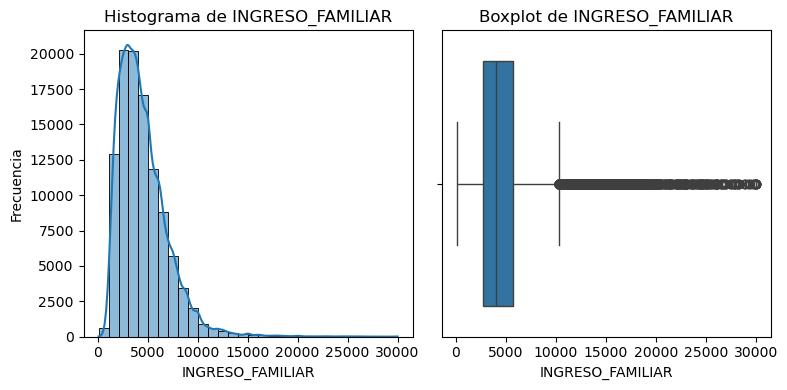

In [168]:
# Visualización Variable: Ingreso familiar 
variables_numericas = ['INGRESO_FAMILIAR']

# Generar un histograma y un boxplot por cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()

**Interpretación:**


El histograma muestra que la mayoría de los ingresos familiares se concentran en el rango de 0 a 5,000 (Soles), con una larga cola hacia la derecha. Esto indica una distribución sesgada a la derecha, lo que significa que la mayoría de las familias tienen ingresos relativamente bajos, pero hay algunas familias con ingresos significativamente más altos.El boxplot muestra claramente que hay muchos outliers en la parte superior de la distribución de los ingresos familiares que se extienden hasta el valor máximo de 30,000 (Soles), lo que sugiere que hay una pequeña pero significativa parte de la población con ingresos muy altos en comparación con la media.

**Desigualdad Económica:** La combinación de una distribución sesgada a la derecha y la presencia de muchos outliers altos indica una desigualdad económica significativa en la población. La mayoría de las familias tiene ingresos bajos, mientras que un pequeño grupo tiene ingresos mucho más altos.

* **Distribución de número de créditos por año**

In [169]:
# Obtener la fecha mínima y máxima en la columna FECHA_CREDITO
fecha_minima = df['FECHA_CREDITO'].min()
fecha_maxima = df['FECHA_CREDITO'].max()

print(f"Fecha mínima: {fecha_minima}")
print(f"Fecha máxima: {fecha_maxima}")

Fecha mínima: 2014-01-07 00:00:00
Fecha máxima: 2024-12-03 00:00:00


AÑO_CREDITO
2014    10744
2015     9074
2016     8068
2017     7079
2018     9118
2019    12206
2020     8340
2021    12843
2022    13472
2023    11375
2024     3534
Name: count, dtype: int64


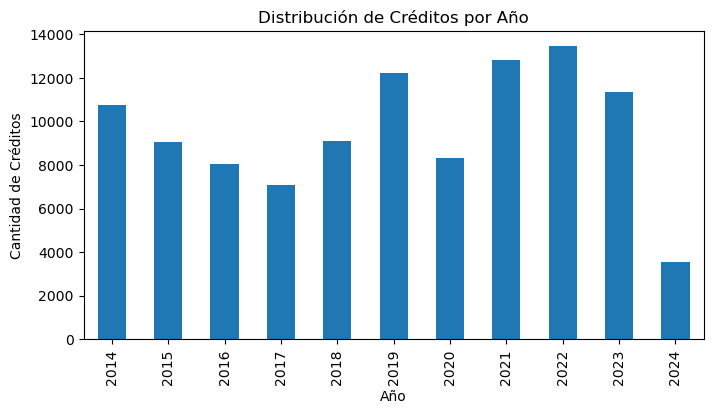

In [170]:
# Crear una nueva columna para el año extraído de FECHA_CREDITO
df['AÑO_CREDITO'] = df['FECHA_CREDITO'].dt.year

# Contar la cantidad de registros por año
distribucion_anual = df['AÑO_CREDITO'].value_counts().sort_index()

# Mostrar la distribución
print(distribucion_anual)

# Visualizar la distribución con un gráfico de barras
plt.figure(figsize=(8, 4))
distribucion_anual.plot(kind='bar')
plt.title('Distribución de Créditos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Créditos')
plt.show()

**Interpretación:**

Hay una evidente fluctuación en la cantidad de créditos otorgados a lo largo de los años. En algunos años, como 2019, 2021 y 2022, se observa un aumento significativo en la cantidad de créditos otorgados, alcanzando su punto máximo en 2022.

_La caída en 2024, es esperada, debido que el corte del dataset se da en el mes de junio del presente año_

* **Distribución edad de los beneficiarios del crédito**

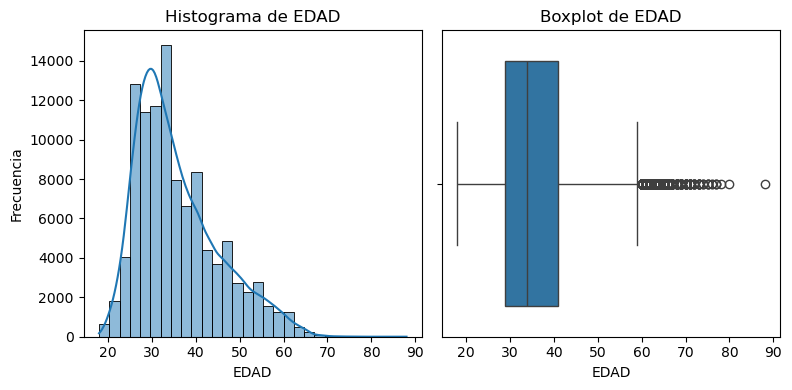

In [171]:
# Visualización variable: Edad 
variables_numericas = ['EDAD']

# Generar un histograma y un boxplot por cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()

**Interpretación**

La mayoría de las personas, relacionadas en el dataset tienen edades jóvenes, con un grupo significativo en los **20-40 años**. La distribución está sesgada hacia la derecha, lo que indica que hay menos personas en edades avanzadas. Los outliers muestran que hay personas mayores en el dataset, pero en menor cantidad.Este análisis puede ser relevante ya que las diferencias en edad podrían correlacionarse con distintos comportamientos o necesidades, lo que podría ser útil para personalizar las soluciones que se le presentan a la población objetivo de la Institución. 

* **Distribución tasa de interés de los créditos colocados**

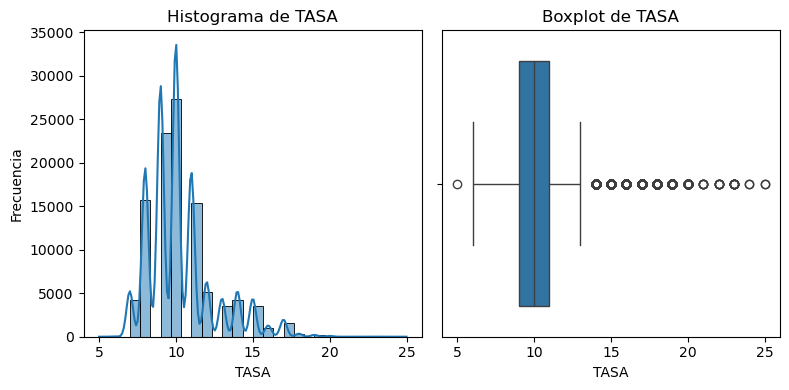

In [172]:
# Visualización variable: Tasa
variables_numericas = ['TASA']

# Generar un histograma y un boxplot por cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()

**Interpretación:**

Se observa una distribución altamente concentrada alrededor de la **tasa de 10%**, con varios picos indicando la posible existencia de valores estándar o comúnmente utilizados. La distribución sesgada a la derecha y la presencia de outliers sugiere que hay pocos casos con tasas significativamente más altas, pero estos no son la norma.

Este análisis sirve como punto de partida para analizar la distribución de tasas en relación con otros factores, como el género o la edad, en el contexto de los créditos. La concentración de valores bajos puede indicar una política de tasas preferenciales o acceso desigual a mejores condiciones crediticias para ciertos grupos. 

* **Distribución de los Plazos de los créditos colocados**

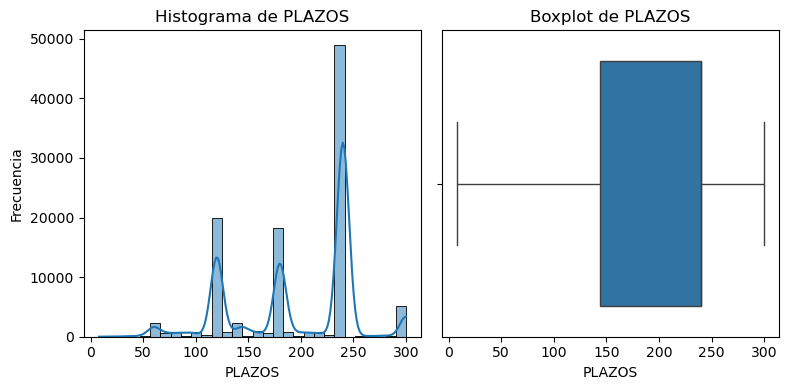

In [173]:
# Visualización variable: Plazos
variables_numericas = ['PLAZOS']

# Generar un histograma y un boxplot por cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()

**Interpretación**

El gráfico de histograma muestra una distribución multimodal, con picos en intervalos predefinidos, especialmente alrededor de **250 (Meses, aproximadamente 21 años)**, que es el plazo más común, en el conjunto de datos. Esto podría indicar una estructura de productos financieros estandarizados, donde ciertos plazos son más atractivos o promovidos. La ausencia de outliers en el boxplot sugiere que estos plazos siguen patrones bien establecidos y no hay valores que se alejen significativamente de la norma.

Este análisis puede ayudar a entender las preferencias de los plazos ofrecidos o seleccionados en los productos financieros del dataset. Este análisis se puede extender a identificar cómo estos plazos se distribuyen entre diferentes segmentos de clientes, géneros o condiciones crediticias para identificar patrones que podrían informar decisiones futuras o intervenciones específicas.

* **Distribución del valor de los préstamos asignados**

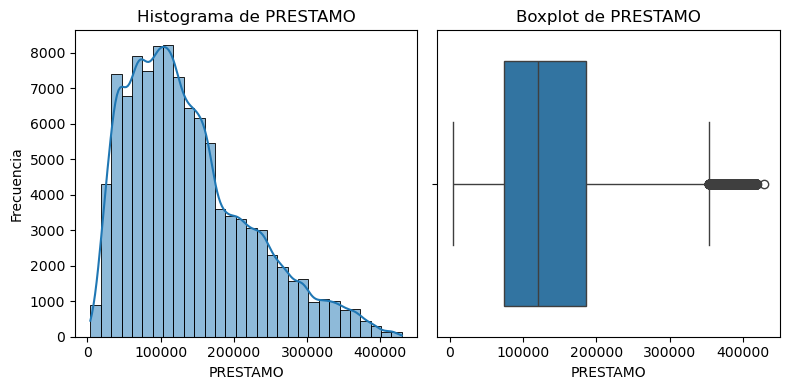

In [174]:
# Visualización variable: Préstamo
variables_numericas = ['PRESTAMO']

# Generar un histograma y un boxplot por cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()

**Interpretación:**

Los gráficos muestran una distribución en la que la mayoría de los préstamos están en el **rango de S/50,000 a S/150,000**, con una caída gradual en la frecuencia a medida que aumenta el monto del préstamo. Los outliers en el extremo derecho del boxplot sugieren la existencia de un número pequeño de préstamos que son significativamente más grandes que la mayoría, lo que puede indicar casos especiales o perfiles de clientes con mayor capacidad crediticia.

Este análisis proporciona una visión clara de la distribución de los montos de préstamo del dataset, lo que podría ser útil para entender las dinámicas de préstamos otorgados en diferentes segmentos. Se puede considerar el análisis de la relación entre el monto del préstamo y otros factores (como el plazo, la tasa, o características del cliente), estos outliers podrían ser áreas de interés particular para investigar más a fondo.

* **Distribución del valor de la vivienda**

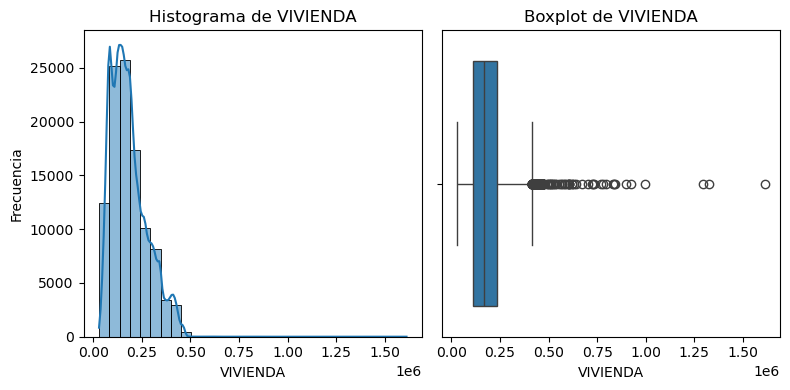

In [175]:
# Visualización variable: Vivienda
variables_numericas = ['VIVIENDA']

# Generar un histograma y un boxplot por cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()

**Interpretación:**

Los gráficos muestran un marcado sesgo a la derecha (como lo muestra el gráfico de histograma), lo que significa que la mayoría de los valores se concentran en el rango más bajo, y hay pocos valores extremadamente altos. La mayor concentración de datos está alrededor de los 0.1 a 0.2 **(100,000 a 200,000 soles)**, lo que sugiere que la mayoría de los valores de la variable VIVIENDA están en este rango.

La caja del boxplot indica que la mayoría de los datos (el 50% central) están entre aproximadamente 0.1 (100,000 soles) y 0.25 (250,000 soles), lo que coincide con la alta concentración de valores observada en el histograma.

### **Análisis Univariado (Variables categóricas previo a codificación)**

**Identificación de las variables categóricas**

In [176]:
# Lista de variables categóricas del dataset

# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Imprimir el listado de variables categóricas
print("Variables categóricas en el dataset:")
for col in categorical_columns:
    print(col)

Variables categóricas en el dataset:
GENERO
DEPARTAMENTO
PROVINCIA
DISTRITO
ESTADO_CIVIL
CONDICION_LABORAL
TIPO_IFI
IFI


* **Distribución % de créditos asignados según género**

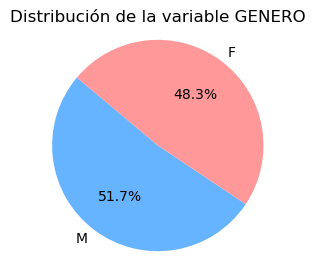

In [177]:
# Visualización variable categórica: Género 

# Contar la frecuencia de cada categoría en la variable 'GENERO'
genero_counts = df['GENERO'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(3, 3))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribución de la variable GENERO')
plt.axis('equal')  # Asegura que el gráfico de pastel sea circular
plt.show()

La distribución del gráfico muestra una tendencia _levemente mayor_ a la asignación de créditos al género Masculino: **51.7%**

* **Distribución del total y % de créditos asignados por departamento**

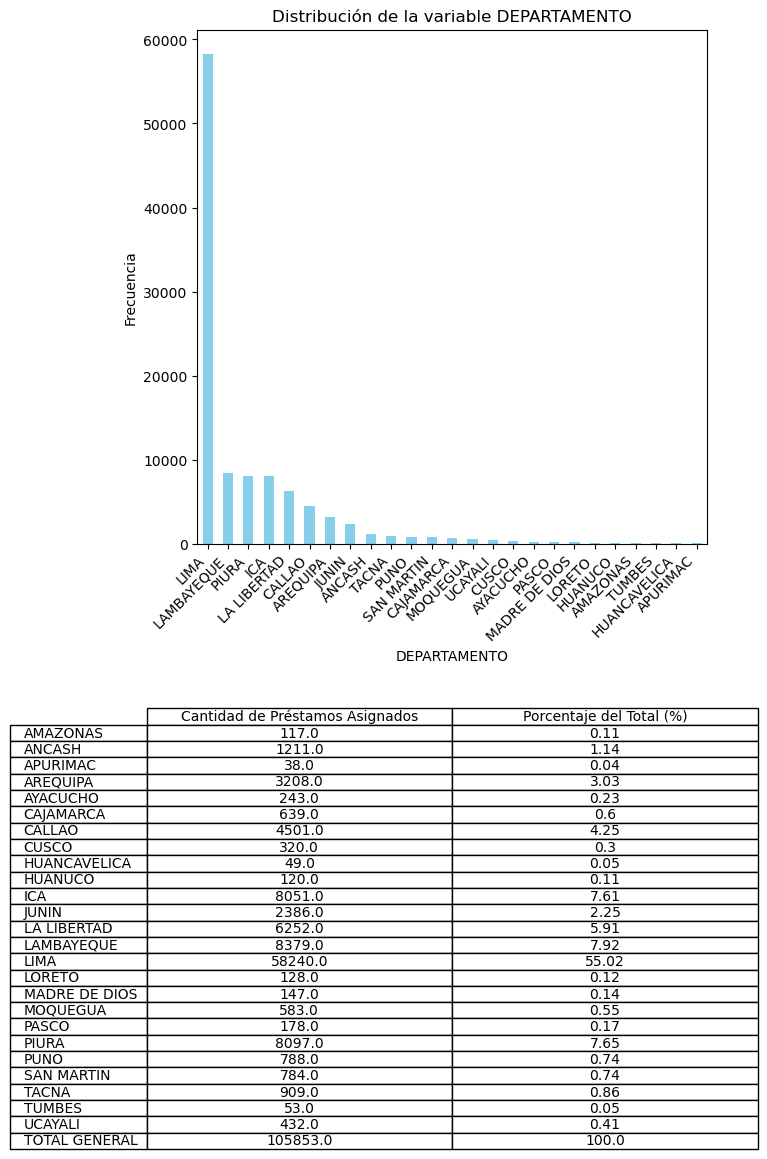

In [178]:
# Visualización variable categórica: Departamento (Donde se encuentra la vivienda)

# Contar la frecuencia de cada categoría en la variable 'DEPARTAMENTO'
departamento_counts = df['DEPARTAMENTO'].value_counts()

# Contar la cantidad de préstamos asignados por departamento (no los montos)
cantidad_prestamos_por_departamento = df.groupby('DEPARTAMENTO')['PRESTAMO'].count()

# Calcular el total general
total_general = cantidad_prestamos_por_departamento.sum()

# Calcular el porcentaje que representa cada departamento del total general y limitar a dos decimales
porcentaje_por_departamento = (cantidad_prestamos_por_departamento / total_general * 100).round(2)

# Crear una tabla combinada con la cantidad de préstamos y su porcentaje
tabla = pd.DataFrame({
    'Cantidad de Préstamos Asignados': cantidad_prestamos_por_departamento,
    'Porcentaje del Total (%)': porcentaje_por_departamento
})

# Añadir la fila del total general
total_row = pd.DataFrame({
    'Cantidad de Préstamos Asignados': [total_general],
    'Porcentaje del Total (%)': [100.00]
}, index=['TOTAL GENERAL'])

tabla = pd.concat([tabla, total_row])

# Crear una figura con dos subplots: uno para el gráfico de barras y otro para la tabla
fig, ax = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [3, 1]})

# Gráfico de barras
departamento_counts.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Distribución de la variable DEPARTAMENTO')
ax[0].set_xlabel('DEPARTAMENTO')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(departamento_counts.index, rotation=45, ha='right')

# Mejorar la visualización de la tabla
ax[1].axis('tight')
ax[1].axis('off')

tabla_formatted = ax[1].table(cellText=tabla.values, 
                              colLabels=tabla.columns, 
                              rowLabels=tabla.index, 
                              cellLoc='center', 
                              loc='center')

tabla_formatted.auto_set_font_size(False)
tabla_formatted.set_fontsize(10)
tabla_formatted.scale(1.2, 1.2)  # Ajusta el tamaño de la tabla

plt.tight_layout()
plt.show()

**Interpretación**

Del total de créditos colocados en el período 2014-2024 el **_55%_** ha sido para viviendas en **Lima**, lo cual es coherente con la concentración de la Población del país que, según el portal: StatisticsTimes: Peru population 2024 concentra aproximadamente el 30% de la población total de Perú. Fuente: https://statisticstimes.com/demographics/country/peru-population.php 

La asignación de créditos por departamento siguen en menor proporción (Menos del 10%) en Piura, Ica, la libertad y Callao, los demás departamentos relacionados en el dataset muestran una colocación de créditos para vivienda inferior al 1% sobre el total general.

* **Distribución del total y % de créditos asignados por provincias (Top 10)**

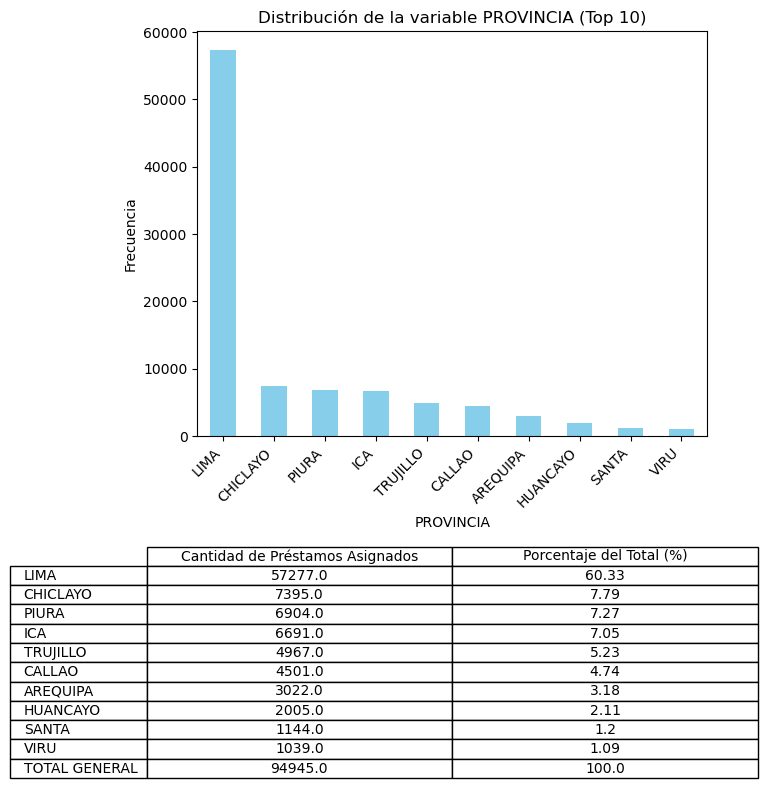

In [179]:
# Visualización variable categórica: Provincia (Las 10 más frecuentes)

# Contar la frecuencia de cada categoría en la variable 'PROVINCIA'
provincia_counts = df['PROVINCIA'].value_counts()

# Seleccionar las 10 provincias más frecuentes
top_10_provincias = provincia_counts.nlargest(10)

# Contar la cantidad de préstamos asignados por las 10 provincias más frecuentes
cantidad_prestamos_por_provincia = df.groupby('PROVINCIA')['PRESTAMO'].count().reindex(top_10_provincias.index)

# Calcular el total general para las 10 provincias
total_general_top_10 = cantidad_prestamos_por_provincia.sum()

# Calcular el porcentaje que representa cada una de las 10 provincias del total general
porcentaje_por_provincia = (cantidad_prestamos_por_provincia / total_general_top_10 * 100).round(2)

# Crear una tabla combinada con la cantidad de préstamos y su porcentaje
tabla = pd.DataFrame({
    'Cantidad de Préstamos Asignados': cantidad_prestamos_por_provincia,
    'Porcentaje del Total (%)': porcentaje_por_provincia
})

# Añadir la fila del total general para las 10 provincias
total_row = pd.DataFrame({
    'Cantidad de Préstamos Asignados': [total_general_top_10],
    'Porcentaje del Total (%)': [100.00]
}, index=['TOTAL GENERAL'])

tabla = pd.concat([tabla, total_row])

# Crear una figura con dos subplots: uno para el gráfico de barras y otro para la tabla
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

# Gráfico de barras para las 10 provincias más frecuentes
top_10_provincias.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Distribución de la variable PROVINCIA (Top 10)')
ax[0].set_xlabel('PROVINCIA')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(top_10_provincias.index, rotation=45, ha='right')

# Mejorar la visualización de la tabla
ax[1].axis('tight')
ax[1].axis('off')

tabla_formatted = ax[1].table(cellText=tabla.values, 
                              colLabels=tabla.columns, 
                              rowLabels=tabla.index, 
                              cellLoc='center', 
                              loc='center')

tabla_formatted.auto_set_font_size(False)
tabla_formatted.set_fontsize(10)
tabla_formatted.scale(1.2, 1.2)  # Ajusta el tamaño de la tabla

plt.tight_layout()
plt.show()

**Interpretación**

Ante el amplio margen de provincias, el gráfico y la tabla resumen sólo muestran el top 10 de provincias en las que más se han colocado los préstamos de viviendas en el período 2014-2024; estas 10 provincias equivalen al **89.6%** del total reportado en el dataset. La mayor tendencia está en la compra de vivienda en la provincia de **Lima con el 60.3%** seguido de Chiclayo, Piura e Ica con menos del 10% sobre el total general del número de créditos otorgados. 

* **Distribución del total y % de créditos asignados para vivienda en la provincia de Lima**

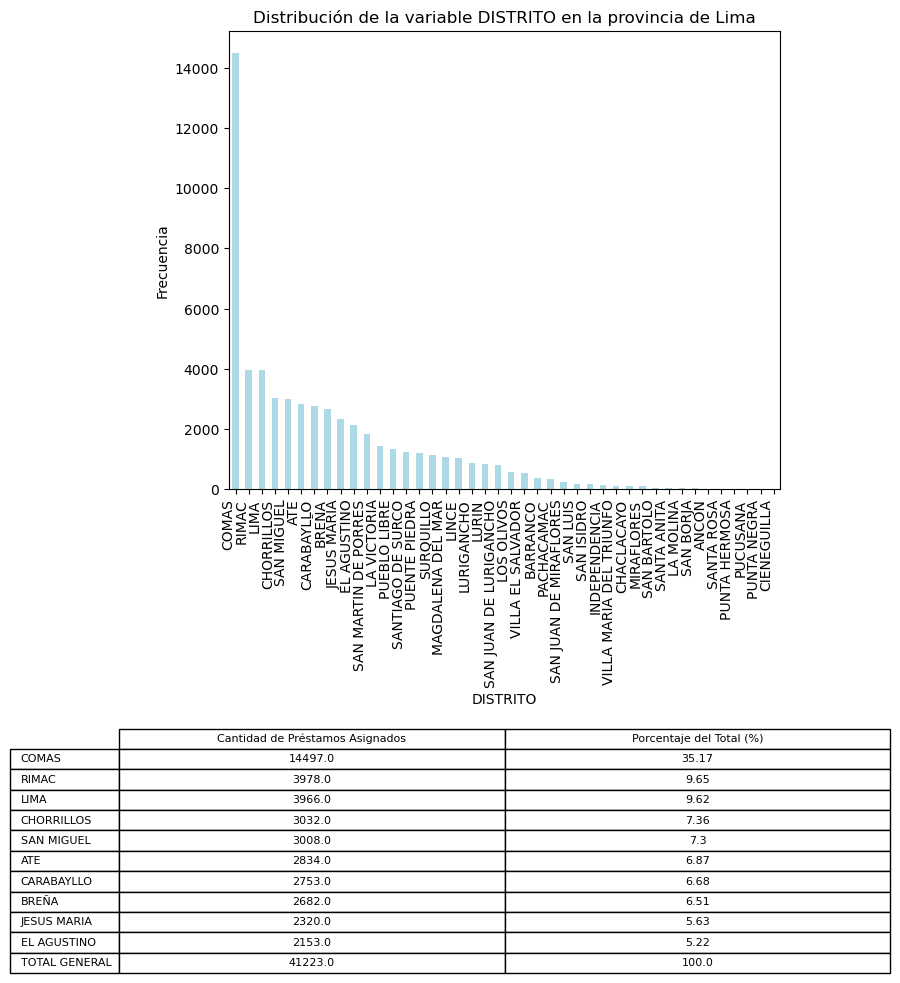

In [180]:
# Visualización variable: Distrito (Solo para la provincia Lima)

# Filtrar solo las filas correspondientes a la provincia de Lima
lima_provincia_df = df[(df['DEPARTAMENTO'] == 'LIMA') & (df['PROVINCIA'] == 'LIMA')]

# Contar la frecuencia de cada categoría en la variable 'DISTRITO' dentro de la provincia de Lima
distrito_counts_lima_provincia = lima_provincia_df['DISTRITO'].value_counts()

# Seleccionar los 10 distritos más frecuentes
top_10_distritos = distrito_counts_lima_provincia.nlargest(10)

# Calcular el total general para los 10 distritos
total_general_top_10 = top_10_distritos.sum()

# Calcular el porcentaje que representa cada uno de los 10 distritos del total general y limitar a dos decimales
porcentaje_por_distrito_top_10 = (top_10_distritos / total_general_top_10 * 100).round(2)

# Crear una tabla combinada con la cantidad de préstamos y su porcentaje
tabla_top_10 = pd.DataFrame({
    'Cantidad de Préstamos Asignados': top_10_distritos,
    'Porcentaje del Total (%)': porcentaje_por_distrito_top_10
})

# Añadir la fila del total general para los 10 distritos
total_row_top_10 = pd.DataFrame({
    'Cantidad de Préstamos Asignados': [total_general_top_10],
    'Porcentaje del Total (%)': [100.00]
}, index=['TOTAL GENERAL'])

tabla_top_10 = pd.concat([tabla_top_10, total_row_top_10])

# Crear una figura con dos subplots: uno para el gráfico de barras y otro para la tabla
fig, ax = plt.subplots(2, 1, figsize=(10,10), gridspec_kw={'height_ratios': [3, 1]})

# Gráfico de barras para la distribución de DISTRITO en la provincia de Lima
distrito_counts_lima_provincia.plot(kind='bar', color='lightblue', ax=ax[0])
ax[0].set_title('Distribución de la variable DISTRITO en la provincia de Lima')
ax[0].set_xlabel('DISTRITO')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(distrito_counts_lima_provincia.index, rotation=90, ha='right')

# Mejorar la visualización de la tabla (solo para el top 10)
ax[1].axis('tight')
ax[1].axis('off')

tabla_formatted = ax[1].table(cellText=tabla_top_10.values, 
                              colLabels=tabla_top_10.columns, 
                              rowLabels=tabla_top_10.index, 
                              cellLoc='center', 
                              loc='center')

# Ajustar el tamaño y escala de la tabla para mejorar la legibilidad
tabla_formatted.auto_set_font_size(False)
tabla_formatted.set_fontsize(8)
tabla_formatted.scale(1.4, 1.4)  # Aumenta la escala de la tabla para mejor legibilidad

plt.tight_layout()
plt.show()

**Interpretación**

El **35%** del total de créditos ha sido para compra de vivienda en el distrito de **Comas** seguido de Rimac y Lima con menos del 10%.

* **Distribución del total de créditos colocados según estado civil**

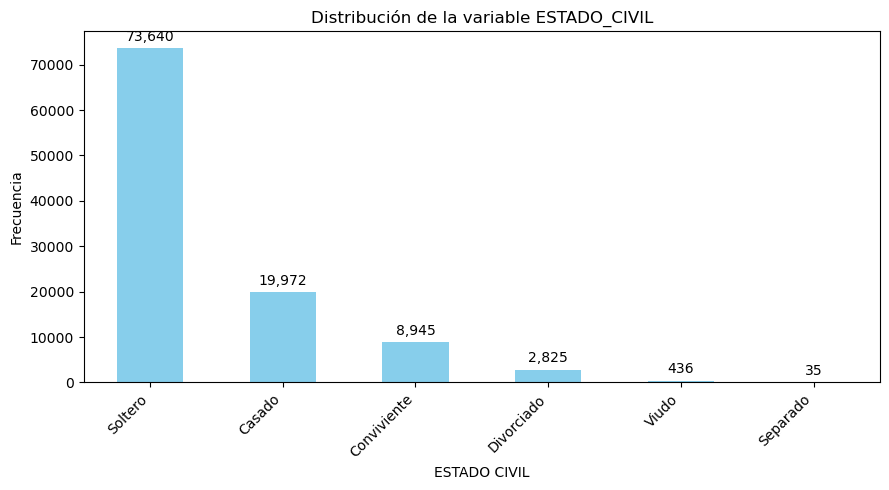

In [181]:
# Visualización: Estado civil 

# Contar la frecuencia de cada categoría en la variable 'ESTADO_CIVIL'
estado_civil_counts = df['ESTADO_CIVIL'].value_counts()

# Crear un gráfico de barras para la distribución de ESTADO_CIVIL
plt.figure(figsize=(9, 5))
bars = estado_civil_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable ESTADO_CIVIL')
plt.xlabel('ESTADO CIVIL')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas sobre cada barra con el total graficado
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ',d'), 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  xytext=(0, 3),  # Desplazamiento de las etiquetas en píxeles
                  textcoords="offset points", 
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Interpretación**

La mayor asignación de créditos para vivienda se han otorgado a personas con **estado civil soltero: 73.640 lo que equivale al 69.5%**. Este resultado puede tener implicaciones importantes en el contexto de la reducción de brechas y desigualdades sociales:

**Evaluación de Inclusividad:** Es crucial asegurar que las políticas que favorecen a un grupo (en este caso, personas solteras) no generen nuevas formas de desigualdad para otros grupos que también podrían estar en situaciones vulnerables.
En resumen, este dato puede ser visto como un indicador positivo en términos de acceso a vivienda y reducción de brechas, pero también requiere un análisis más profundo para asegurarse de que no esté contribuyendo a nuevas formas de desigualdad.

* **Distribución del total de créditos colocados según condición laboral**

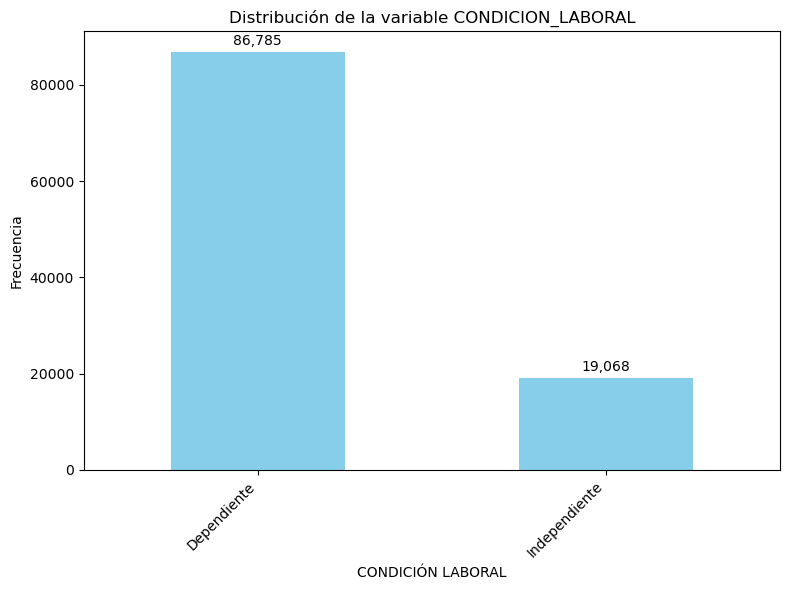

In [182]:
# Visualización variable categórica: Condición laboral 

# Contar la frecuencia de cada categoría en la variable 'CONDICION_LABORAL'
condicion_laboral_counts = df['CONDICION_LABORAL'].value_counts()

# Crear un gráfico de barras para la distribución de CONDICION_LABORAL
plt.figure(figsize=(8, 6))
bars = condicion_laboral_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable CONDICION_LABORAL')
plt.xlabel('CONDICIÓN LABORAL')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas sobre cada barra con el total graficado
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ',d'), 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  xytext=(0, 3),  # Desplazamiento de las etiquetas en píxeles
                  textcoords="offset points", 
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Interpretación**

Si bien la mayor tendencia está en el otorgamiento de crédito a personas con codición laboral dependiente, los datos muestran que de un total de 105.853 créditos otorgados en el período la condición de no contar con un contrato laboral dependiente no es un barrera para la asignación de los créditos de la vivienda, ya que se **entregaron 19.068 para personas con condición laboral independiente.**

* **Distribución del total de créditos colocados según TIPO IFI**

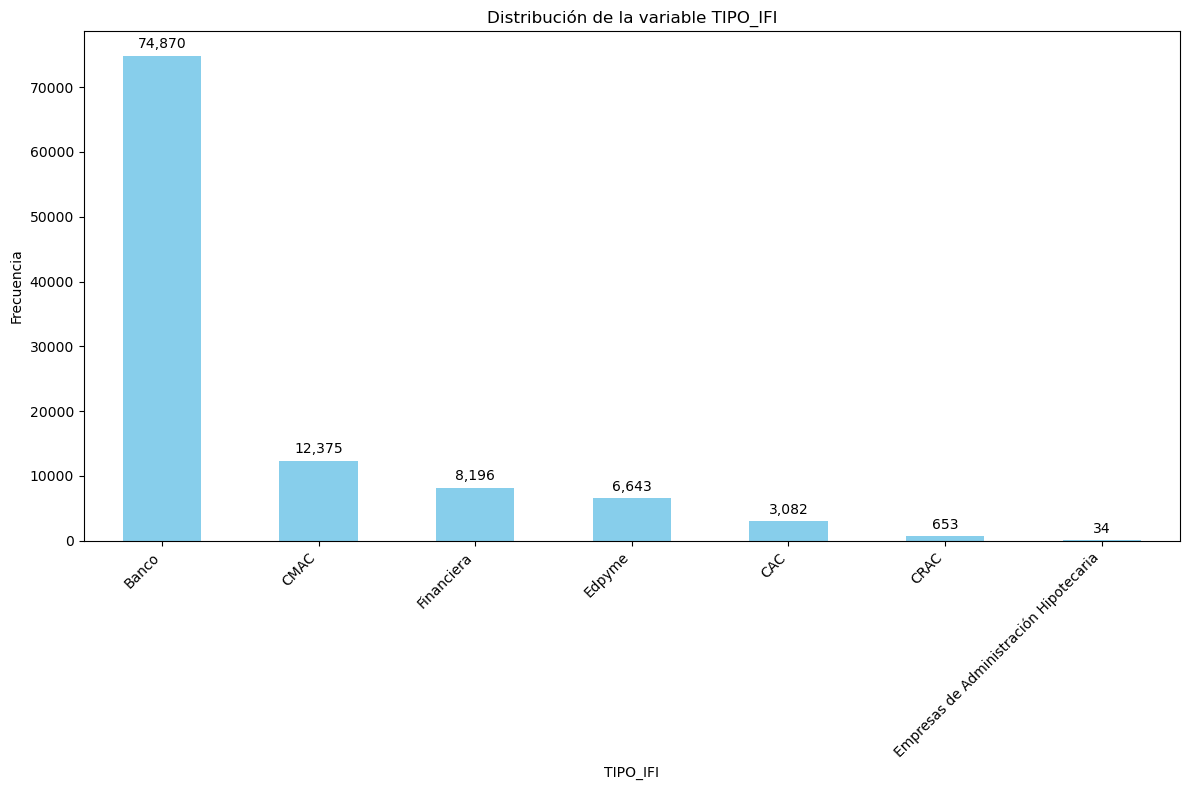

In [183]:
# Visualización variable categórica: Tipo Ifi (Institución Financiera Intermediaria, que opera bajo el ámbito de supervisión 
# de la SBS y es considerada como apta por el FMV para el otorgamiento de los créditos MIVIVIENDA)

# Contar la frecuencia de cada categoría en la variable 'TIPO_IFI'
tipo_ifi_counts = df['TIPO_IFI'].value_counts()

# Crear un gráfico de barras para la distribución de TIPO_IFI
plt.figure(figsize=(12, 8))
bars = tipo_ifi_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable TIPO_IFI')
plt.xlabel('TIPO_IFI')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas sobre cada barra con el total graficado
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ',d'), 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  xytext=(0, 3),  # Desplazamiento de las etiquetas en píxeles
                  textcoords="offset points", 
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Interpretación:**

**74.870 créditos MIVIVIENDA han sido asignados a través de Banco (Banca Múltiple)**, seguido por 12.375 colocados por intermedio de CMAC: Caja Municipal de Ahorro y Crédito y en tercer lugar Financiera con 8.196 del total de los créditos.

* **Distribución del total de créditos colocados según IFI**

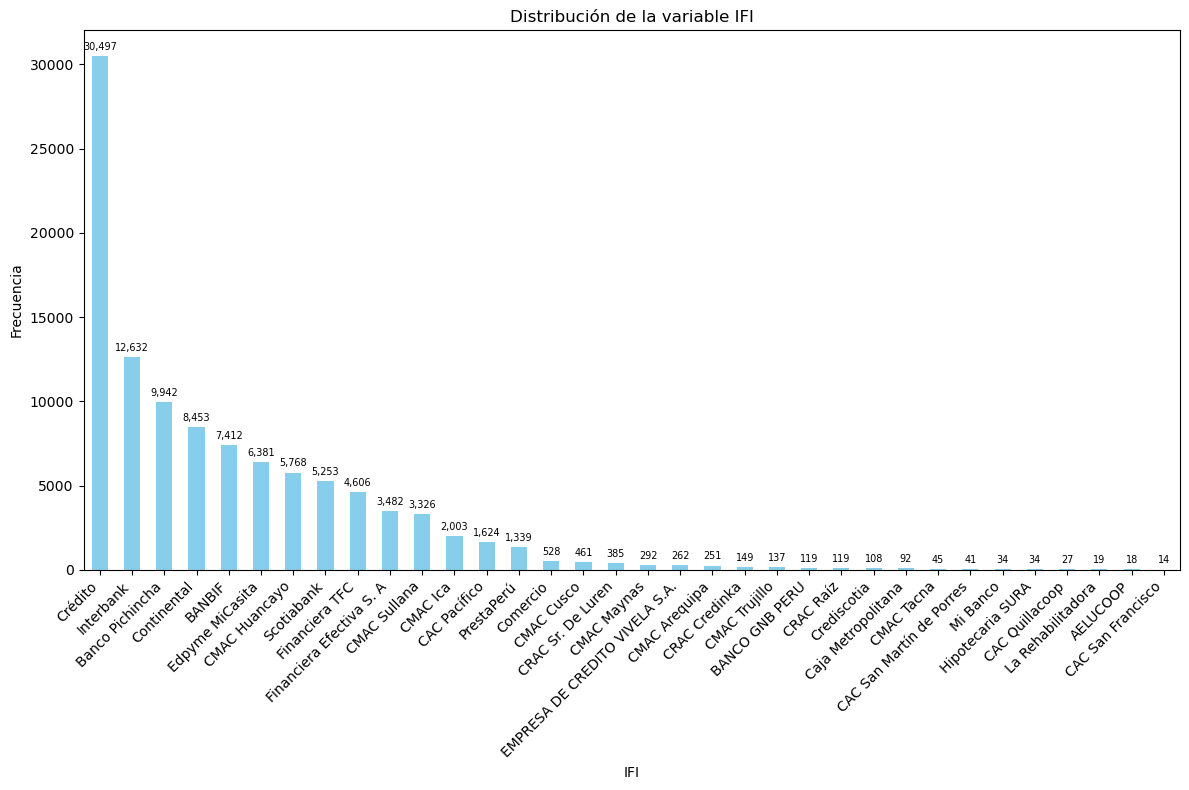

In [184]:
# Visualización variable categórica: IFI (Institución Financiera Intermediaria, que opera bajo el ámbito de supervisión
# de la SBS y es considerada como apta por el FMV para el otorgamiento de los créditos MIVIVIENDA.

# Contar la frecuencia de cada categoría en la variable 'IFI'
ifi_counts = df['IFI'].value_counts()

# Crear un gráfico de barras para la distribución de IFI
plt.figure(figsize=(12, 8))
bars = ifi_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable IFI')
plt.xlabel('IFI')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas sobre cada barra con un tamaño de fuente más pequeño
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ',d'), 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  xytext=(0, 3),  # Desplazamiento de las etiquetas en píxeles
                  textcoords="offset points", 
                  ha='center', va='bottom',
                  fontsize=7)  # Tamaño de la fuente reducido

plt.tight_layout()
plt.show()

**La mayor cantidad de préstamos MIVIENDA se asignaron a través del Banco de crédito del Perú con un total de _30.497_** créditos seguido por Interbank con _12.632_ y Banco Pichincha con _9.942_.

### **Codificación variables categóricas con One Hot encoding (OHE)**

In [185]:
#Verificar cuantas categorias tiene cada variable categórica del dataset

# Lista de variables categóricas
categorical_variables = ['GENERO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'ESTADO_CIVIL', 'CONDICION_LABORAL', 'TIPO_IFI', 'IFI']

# Contar el número de categorías para cada variable categórica
for variable in categorical_variables:
    num_categories = df[variable].nunique()
    print(f'La variable {variable} tiene {num_categories} categorías.')

La variable GENERO tiene 2 categorías.
La variable DEPARTAMENTO tiene 25 categorías.
La variable PROVINCIA tiene 106 categorías.
La variable DISTRITO tiene 398 categorías.
La variable ESTADO_CIVIL tiene 6 categorías.
La variable CONDICION_LABORAL tiene 2 categorías.
La variable TIPO_IFI tiene 7 categorías.
La variable IFI tiene 34 categorías.


In [186]:
#Codificación de variables categóricas de dos categorías con OHE

# Variables con dos categorías
variables_dos_categorias = ['GENERO', 'CONDICION_LABORAL']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=variables_dos_categorias, drop_first=False)

# Convertir solo las columnas con valores True/False a 0/1
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Mostrar las nuevas columnas creadas y un ejemplo del dataframe
print(df_encoded.head())

# Crear un diccionario para almacenar las etiquetas y valores asignados
one_hot_dict = {}

for variable in variables_dos_categorias:
    one_hot_dict[variable] = list(df[variable].unique())

print("Diccionario de etiquetas por variable categórica:")
print(one_hot_dict)

  FECHA_CREDITO  UBIGEO DEPARTAMENTO         PROVINCIA              DISTRITO  \
0    2014-01-24  150110         LIMA              LIMA                 COMAS   
1    2014-01-28  250101      UCAYALI  CORONEL PORTILLO              CALLERIA   
2    2014-01-29  110101          ICA               ICA                   ICA   
3    2014-01-29  150135         LIMA              LIMA  SAN MARTIN DE PORRES   
4    2014-07-01  240101       TUMBES            TUMBES                TUMBES   

  ESTADO_CIVIL TIPO_IFI              IFI  INGRESO_FAMILIAR  EDAD  TASA  \
0       Casado   Edpyme  Edpyme MiCasita            2440.0    46  10.0   
1      Soltero      CAC       PrestaPerú            4150.0    39  12.0   
2       Casado    Banco           BANBIF            8105.0    36  10.0   
3      Soltero    Banco        Interbank            5000.0    48  11.0   
4  Conviviente     CMAC     CMAC Sullana            2043.7    37  16.0   

   PLAZOS   PRESTAMO   VIVIENDA FECHA_CORTE  AÑO_CREDITO  GENERO_F  GENERO

In [187]:
#Codificación variables categóricas con mas de dos y menos de 10 categorias 

# Variables con más de dos categorías y menos de 10
variables_multiples_categorias = ['ESTADO_CIVIL', 'TIPO_IFI']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=variables_multiples_categorias, drop_first=False)

# Crear un diccionario para almacenar las etiquetas y valores asignados
one_hot_dict = {}

for variable in variables_multiples_categorias:
    # Extraer las columnas correspondientes a la variable actual
    ohe_columns = [col for col in df_encoded.columns if col.startswith(variable)]
    
    # Almacenar las etiquetas en el diccionario
    one_hot_dict[variable] = ohe_columns

# Mostrar el resultado de la codificación
print("Diccionario de etiquetas y valores asignados:")
for variable, columns in one_hot_dict.items():
    print(f"Variable: {variable}")
    for col in columns:
        print(f" - {col}")

# Mostrar las primeras filas del dataframe codificado para ver el resultado
print(df_encoded.head())

Diccionario de etiquetas y valores asignados:
Variable: ESTADO_CIVIL
 - ESTADO_CIVIL_Casado
 - ESTADO_CIVIL_Conviviente
 - ESTADO_CIVIL_Divorciado
 - ESTADO_CIVIL_Separado
 - ESTADO_CIVIL_Soltero
 - ESTADO_CIVIL_Viudo
Variable: TIPO_IFI
 - TIPO_IFI_Banco
 - TIPO_IFI_CAC
 - TIPO_IFI_CMAC
 - TIPO_IFI_CRAC
 - TIPO_IFI_Edpyme
 - TIPO_IFI_Empresas de Administración Hipotecaria
 - TIPO_IFI_Financiera
  FECHA_CREDITO GENERO  UBIGEO DEPARTAMENTO         PROVINCIA  \
0    2014-01-24      M  150110         LIMA              LIMA   
1    2014-01-28      M  250101      UCAYALI  CORONEL PORTILLO   
2    2014-01-29      M  110101          ICA               ICA   
3    2014-01-29      M  150135         LIMA              LIMA   
4    2014-07-01      F  240101       TUMBES            TUMBES   

               DISTRITO CONDICION_LABORAL              IFI  INGRESO_FAMILIAR  \
0                 COMAS       Dependiente  Edpyme MiCasita            2440.0   
1              CALLERIA       Dependiente       Pre

In [188]:
#Codificación variables con múltiples categorias (Utilizando OHE filtrado)

# Lista de variables con múltiples categorías
variables_multiples_categorias = ['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'IFI']

# Diccionario para guardar las etiquetas y valores asignados
one_hot_dict = {}

# Procesar cada variable categórica
for variable in variables_multiples_categorias:
    # Calcular las 10 categorías más frecuentes
    top_10 = df[variable].value_counts().nlargest(10).index
    
    # Reemplazar las categorías no incluidas en el top 10 por 'Otras'
    df[variable] = df[variable].apply(lambda x: x if x in top_10 else 'Otras')
    
    # Aplicar One-Hot Encoding a la variable modificada
    df_encoded = pd.get_dummies(df, columns=[variable], drop_first=False)
    
    # Extraer las columnas correspondientes a la variable actual
    ohe_columns = [col for col in df_encoded.columns if col.startswith(variable)]
    
    # Guardar las etiquetas en el diccionario
    one_hot_dict[variable] = ohe_columns

# Mostrar el diccionario de etiquetas y valores asignados
print("Diccionario de etiquetas y valores asignados:")
for variable, columns in one_hot_dict.items():
    print(f"Variable: {variable}")
    for col in columns:
        print(f" - {col}")

# Mostrar las primeras filas del dataframe codificado para ver el resultado
print(df_encoded.head())

Diccionario de etiquetas y valores asignados:
Variable: DEPARTAMENTO
 - DEPARTAMENTO_ANCASH
 - DEPARTAMENTO_AREQUIPA
 - DEPARTAMENTO_CALLAO
 - DEPARTAMENTO_ICA
 - DEPARTAMENTO_JUNIN
 - DEPARTAMENTO_LA LIBERTAD
 - DEPARTAMENTO_LAMBAYEQUE
 - DEPARTAMENTO_LIMA
 - DEPARTAMENTO_Otras
 - DEPARTAMENTO_PIURA
 - DEPARTAMENTO_TACNA
Variable: PROVINCIA
 - PROVINCIA_AREQUIPA
 - PROVINCIA_CALLAO
 - PROVINCIA_CHICLAYO
 - PROVINCIA_HUANCAYO
 - PROVINCIA_ICA
 - PROVINCIA_LIMA
 - PROVINCIA_Otras
 - PROVINCIA_PIURA
 - PROVINCIA_SANTA
 - PROVINCIA_TRUJILLO
 - PROVINCIA_VIRU
Variable: DISTRITO
 - DISTRITO_ATE
 - DISTRITO_CALLAO
 - DISTRITO_CARABAYLLO
 - DISTRITO_CHORRILLOS
 - DISTRITO_COMAS
 - DISTRITO_ICA
 - DISTRITO_LA VICTORIA
 - DISTRITO_LIMA
 - DISTRITO_Otras
 - DISTRITO_RIMAC
 - DISTRITO_SAN MIGUEL
Variable: IFI
 - IFI_BANBIF
 - IFI_Banco Pichincha
 - IFI_CMAC Huancayo
 - IFI_Continental
 - IFI_Crédito
 - IFI_Edpyme MiCasita
 - IFI_Financiera Efectiva S. A
 - IFI_Financiera TFC
 - IFI_Interbank
 - I

In [189]:
# Verificando que la codificacón se haya aplicado de manera correcta
columnas_actuales = df_encoded.columns

# Mostrar el listado de columnas
print("Listado de todas las columnas en el DataFrame codificado:")
for columna in columnas_actuales:
    print(columna)

# Verificar que todas las variables categóricas han sido codificadas
# Lista de variables categóricas originales
variables_categoricas = ['GENERO', 'CONDICION_LABORAL', 'ESTADO_CIVIL', 'TIPO_IFI', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'IFI']

# Verificación de codificación
print("\nVerificación de codificación de las variables categóricas:")
for variable in variables_categoricas:
    # Verificar si hay columnas que comienzan con el nombre de la variable original
    columnas_codificadas = [col for col in columnas_actuales if col.startswith(variable)]
    
    if columnas_codificadas:
        print(f"La variable '{variable}' ha sido codificada correctamente con las columnas: {', '.join(columnas_codificadas)}")
    else:
        print(f"Advertencia: La variable '{variable}' no tiene columnas codificadas en el DataFrame.")

# Mostrar las primeras filas del DataFrame para verificar visualmente
print("\nPrimeras filas del DataFrame codificado:")
print(df_encoded.head())

Listado de todas las columnas en el DataFrame codificado:
FECHA_CREDITO
GENERO
UBIGEO
DEPARTAMENTO
PROVINCIA
DISTRITO
ESTADO_CIVIL
CONDICION_LABORAL
TIPO_IFI
INGRESO_FAMILIAR
EDAD
TASA
PLAZOS
PRESTAMO
VIVIENDA
FECHA_CORTE
AÑO_CREDITO
IFI_BANBIF
IFI_Banco Pichincha
IFI_CMAC Huancayo
IFI_Continental
IFI_Crédito
IFI_Edpyme MiCasita
IFI_Financiera Efectiva S. A
IFI_Financiera TFC
IFI_Interbank
IFI_Otras
IFI_Scotiabank

Verificación de codificación de las variables categóricas:
La variable 'GENERO' ha sido codificada correctamente con las columnas: GENERO
La variable 'CONDICION_LABORAL' ha sido codificada correctamente con las columnas: CONDICION_LABORAL
La variable 'ESTADO_CIVIL' ha sido codificada correctamente con las columnas: ESTADO_CIVIL
La variable 'TIPO_IFI' ha sido codificada correctamente con las columnas: TIPO_IFI
La variable 'DEPARTAMENTO' ha sido codificada correctamente con las columnas: DEPARTAMENTO
La variable 'PROVINCIA' ha sido codificada correctamente con las columnas: PR

In [190]:
#Aplicando cambios para la codificación correcta 

# Variables categóricas que necesitan OHE (incluyendo las que tienen múltiples categorías)
variables_categoricas = ['GENERO', 'CONDICION_LABORAL', 'ESTADO_CIVIL', 'TIPO_IFI', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'IFI']

# Filtrar las primeras 10 categorías más frecuentes para variables con muchas categorías y agrupar el resto bajo 'Otras'
for variable in variables_categoricas:
    if df[variable].nunique() > 10:  # Solo agrupar si hay más de 10 categorías
        top_10 = df[variable].value_counts().nlargest(10).index
        df[variable] = df[variable].apply(lambda x: x if x in top_10 else 'Otras')

# Aplicar One-Hot Encoding a todas las variables categóricas
df_encoded = pd.get_dummies(df, columns=variables_categoricas, drop_first=False)

# Verificar que todas las variables categóricas han sido codificadas
print("\nVerificación de codificación de las variables categóricas:")
for variable in variables_categoricas:
    columnas_codificadas = [col for col in df_encoded.columns if col.startswith(variable)]
    
    if columnas_codificadas:
        print(f"La variable '{variable}' ha sido codificada correctamente con las columnas: {', '.join(columnas_codificadas)}")
    else:
        print(f"Advertencia: La variable '{variable}' no tiene columnas codificadas en el DataFrame.")

# Mostrar las primeras filas del DataFrame para verificar visualmente
print("\nPrimeras filas del DataFrame codificado:")
print(df_encoded.head())


Verificación de codificación de las variables categóricas:
La variable 'GENERO' ha sido codificada correctamente con las columnas: GENERO_F, GENERO_M
La variable 'CONDICION_LABORAL' ha sido codificada correctamente con las columnas: CONDICION_LABORAL_Dependiente, CONDICION_LABORAL_Independiente
La variable 'ESTADO_CIVIL' ha sido codificada correctamente con las columnas: ESTADO_CIVIL_Casado, ESTADO_CIVIL_Conviviente, ESTADO_CIVIL_Divorciado, ESTADO_CIVIL_Separado, ESTADO_CIVIL_Soltero, ESTADO_CIVIL_Viudo
La variable 'TIPO_IFI' ha sido codificada correctamente con las columnas: TIPO_IFI_Banco, TIPO_IFI_CAC, TIPO_IFI_CMAC, TIPO_IFI_CRAC, TIPO_IFI_Edpyme, TIPO_IFI_Empresas de Administración Hipotecaria, TIPO_IFI_Financiera
La variable 'DEPARTAMENTO' ha sido codificada correctamente con las columnas: DEPARTAMENTO_ANCASH, DEPARTAMENTO_AREQUIPA, DEPARTAMENTO_CALLAO, DEPARTAMENTO_ICA, DEPARTAMENTO_JUNIN, DEPARTAMENTO_LA LIBERTAD, DEPARTAMENTO_LAMBAYEQUE, DEPARTAMENTO_LIMA, DEPARTAMENTO_Otras

In [191]:
#Verificando el tipo de datos de cada columna después de la codificación
# Mostrar el listado de las variables y el tipo de dato de cada una
tipo_de_datos = df_encoded.dtypes

# Imprimir los resultados
print("Listado de variables y sus tipos de datos:")
print(tipo_de_datos)

Listado de variables y sus tipos de datos:
FECHA_CREDITO          datetime64[ns]
UBIGEO                          int64
INGRESO_FAMILIAR              float64
EDAD                            int64
TASA                          float64
                            ...      
IFI_Edpyme MiCasita              bool
IFI_Financiera TFC               bool
IFI_Interbank                    bool
IFI_Otras                        bool
IFI_Scotiabank                   bool
Length: 67, dtype: object


## **Análisis Bivariado y Multivariado:** 
### Respuesta a preguntas Clave

### **¿Existe una correlación entre el monto del préstamo y el valor de la vivienda?**

**Objetivo:** Analizar si la colocación de créditos está alineada al valor de las viviendas, independientemente que sea para compra o mejora de la misma. 

In [192]:
# Calcular la Diferencia entre el Monto del Préstamo y el Valor de la Vivienda
df_encoded['DIFERENCIA'] = df_encoded['VIVIENDA'] - df_encoded['PRESTAMO']

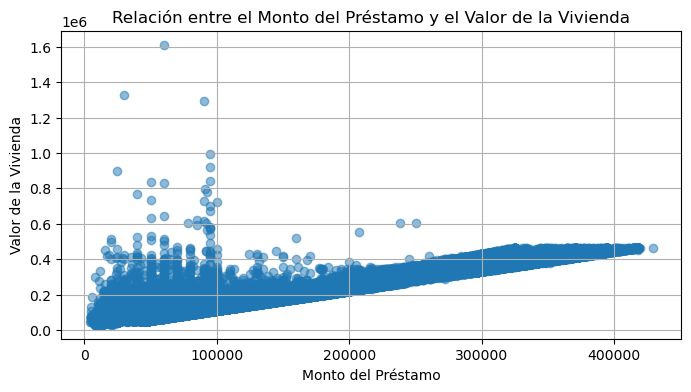

In [193]:
# Visualización de la relación entre el monto del préstamo y el valor de la vivienca
plt.figure(figsize=(8, 4))
plt.scatter(df_encoded['PRESTAMO'], df_encoded['VIVIENDA'], alpha=0.5)
plt.title('Relación entre el Monto del Préstamo y el Valor de la Vivienda')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Valor de la Vivienda')
plt.grid(True)
plt.show()

**Interpretación del gráfico:**
La mayor parte de los datos está concentrada en la parte inferior izquierda del gráfico (entre 0 y 100,000 en el monto del préstamo y entre 0 y 300,000 en el valor de la vivienda). Esto podría indicar que la mayoría de los créditos otorgados son para viviendas de menor valor, lo cual es consistente con programas de vivienda social o de acceso a viviendas para personas de menores ingresos.

In [194]:
#Calculando la correlación entre el monto prestado y el valor de la vivienda
correlacion = df_encoded['PRESTAMO'].corr(df_encoded['VIVIENDA'])
print(f"Correlación entre el Monto del Préstamo y el Valor de la Vivienda: {correlacion}")

Correlación entre el Monto del Préstamo y el Valor de la Vivienda: 0.9536809396501924


**Correlación Muy Fuerte:** El resultado de la prueba de correlación (0.95) indica una **relación lineal muy fuerte y positiva entre el monto del préstamo y el valor de la vivienda.** Esto significa que, en general, a medida que aumenta el valor de la vivienda, también aumenta de manera consistente el monto del préstamo.

**Conclusión:**

Los datos sugieren que **los préstamos otorgados están generalmente bien alineados con el valor de las viviendas**, lo cual es un signo positivo de que el programa Mivivienda está financiando las viviendas de manera acorde a su valor. La concentración de datos en valores más bajos podría reflejar que el programa tiene un enfoque en la financiación de viviendas más accesibles, lo que puede estar alineado con los objetivos sociales del programa.La mayor dispersión en valores altos sugiere que podrían existir diferentes políticas o criterios para la financiación de viviendas más caras. 

### **¿Cuál es la relación entre el monto del préstamo y los plazos de amortización?**

**Objetivo:** Determinar a partir del análisis de los datos si a mayores montos de los prestamos hay un aumento de los plazos.

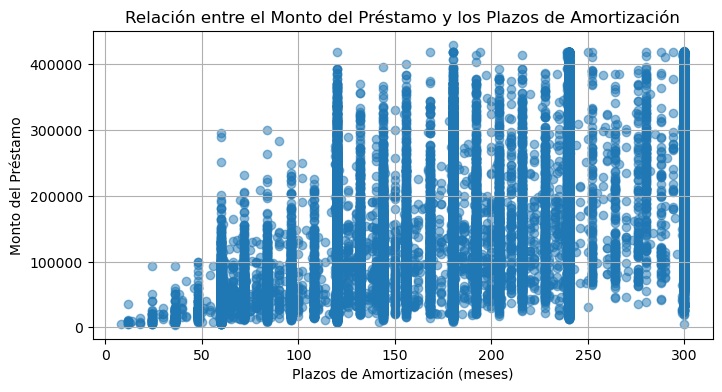

In [195]:
#Visualización de la Relación entre el Monto del Préstamo y los Plazos

plt.figure(figsize=(8, 4))
plt.scatter(df_encoded['PLAZOS'], df_encoded['PRESTAMO'], alpha=0.5)
plt.title('Relación entre el Monto del Préstamo y los Plazos de Amortización')
plt.xlabel('Plazos de Amortización (meses)')
plt.ylabel('Monto del Préstamo')
plt.grid(True)
plt.show()

**Interpretación del gráfico:**

**_Relación Positiva, pero No Determinante:_** Aunque los plazos más largos tienden a estar asociados con montos de préstamos mayores, la dispersión en los datos indica que no es el único factor determinante. Podría ser útil profundizar en cómo otras variables, como el ingreso familiar o el tipo de vivienda, interactúan con los plazos y el monto del préstamo.

In [196]:
#prueba de correlación
correlacion_prestamo_plazos = df_encoded['PRESTAMO'].corr(df_encoded['PLAZOS'])
print(f"Correlación entre el Monto del Préstamo y los Plazos: {correlacion_prestamo_plazos}")

Correlación entre el Monto del Préstamo y los Plazos: 0.4828587910897817


**Correlación Moderada:** El coeficiente de correlación de 0.48 indica una relación moderada y positiva entre el monto del préstamo y los plazos de amortización. Esto sugiere que, aunque existe una tendencia a que los préstamos de mayor monto se otorguen con plazos más largos, esta no es una regla estricta. Hay otros factores que influyen en el monto del préstamo además de los plazos.

In [197]:
#Análisis por subgrupos

df_encoded['Rango_Plazos'] = pd.cut(df_encoded['PLAZOS'], bins=[0, 60, 120, 180, 240, 300], labels=['0-5 años', '5-10 años', '10-15 años', '15-20 años', '20-25 años'])

promedio_prestamo_por_plazo = df_encoded.groupby('Rango_Plazos')['PRESTAMO'].mean()
print(promedio_prestamo_por_plazo)

Rango_Plazos
0-5 años       38930.001512
5-10 años      86040.892848
10-15 años    118981.148790
15-20 años    166059.754074
20-25 años    213062.699868
Name: PRESTAMO, dtype: float64


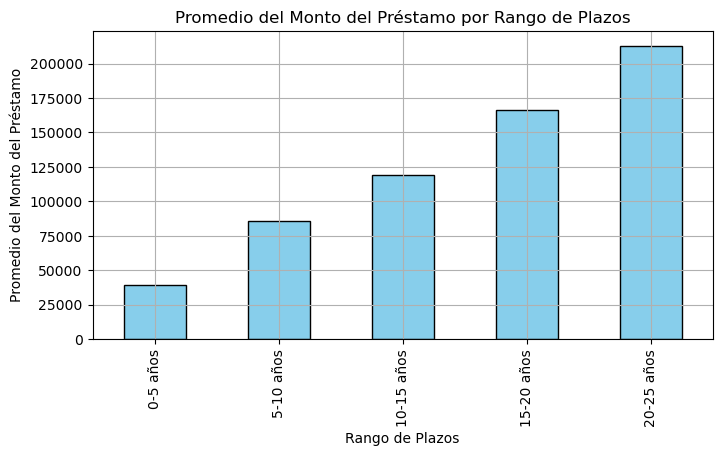

In [198]:
plt.figure(figsize=(8, 4))
promedio_prestamo_por_plazo.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Promedio del Monto del Préstamo por Rango de Plazos')
plt.xlabel('Rango de Plazos')
plt.ylabel('Promedio del Monto del Préstamo')
plt.grid(True)
plt.show()

**Conclusión:**

**El análisis visual y las pruebas estadísticas muestran que a medida que los plazos aumentan, también aumenta el monto promedio del préstamo**. Esto es consistente con la lógica de que los beneficiarios que solicitan plazos más largos tienden a pedir montos más altos, posiblemente para reducir el impacto de las cuotas mensuales en sus ingresos.

### **¿Cuál es la relación entre el Género y el monto del préstamo otorgado?**

**Objetivo:** Analizar si de acuerdo al Género hay una mayor tendencia a recibir préstamos más altos o más bajos. 

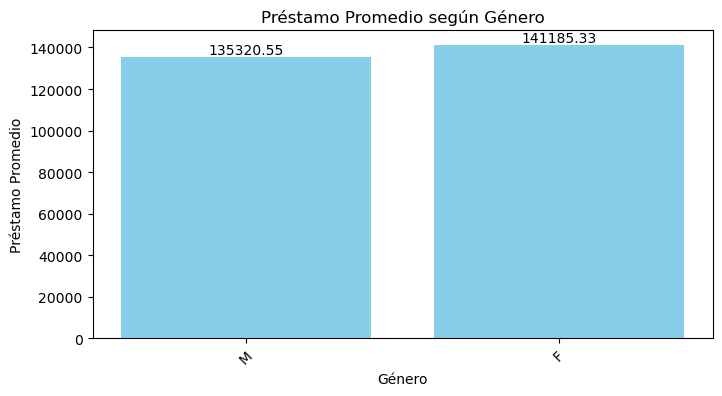

In [199]:
# Creando el gráfico Género-Promedio monto otorgado

generos = ['GENERO_M', 'GENERO_F']

promedios_prestamo = {}
for genero in generos:
    promedios_prestamo[genero] = df_encoded[df_encoded[genero] == 1]['PRESTAMO'].mean()

# Convertir a un DataFrame para facilitar la visualización
promedios_prestamo_df = pd.DataFrame(list(promedios_prestamo.items()), columns=['Género', 'Préstamo Promedio'])

# Remover el prefijo 'GENERO_' para que las etiquetas sean más claras
promedios_prestamo_df['Género'] = promedios_prestamo_df['Género'].str.replace('GENERO_', '')

# Visualizar el resultado con un gráfico de barras
plt.figure(figsize=(8, 4))
bars = plt.bar(promedios_prestamo_df['Género'], promedios_prestamo_df['Préstamo Promedio'], color='skyblue')

# Añadir etiquetas encima de cada barra para mostrar el valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Género')
plt.ylabel('Préstamo Promedio')
plt.title('Préstamo Promedio según Género')
plt.xticks(rotation=45)
plt.show()

_**No se evidencian diferencias significativas entre el promedio del monto otorgado según el Género.**_

In [200]:
# Cálculo de Cohen's d para cuantificar la magnitud de la diferencia entre los dos grupos (Hombres y mujeres)

# Variables de género
masculino = df_encoded[df_encoded['GENERO_M'] == 1]['PRESTAMO']
femenino = df_encoded[df_encoded['GENERO_F'] == 1]['PRESTAMO']

# Calcular el tamaño del efecto Cohen's d
mean_masculino = np.mean(masculino)
mean_femenino = np.mean(femenino)
n_masculino = len(masculino)
n_femenino = len(femenino)
std_masculino = np.std(masculino, ddof=1)
std_femenino = np.std(femenino, ddof=1)

# Pooled standard deviation
pooled_std = np.sqrt(((n_masculino - 1) * std_masculino ** 2 + (n_femenino - 1) * std_femenino ** 2) / (n_masculino + n_femenino - 2))

# Cohen's d
cohens_d = (mean_femenino - mean_masculino) / pooled_std

print(f"Cohen's d: {cohens_d}")

Cohen's d: 0.07009173498417684


**Conclusión:**

**No hay un fuerte sesgo de género:** Basado en este tamaño de efecto (0.070) y en lo evidenciado en el gráfico, no se evidencia que haya un sesgo fuerte a favor de las mujeres en la asignación de préstamos en el dataset. Aunque las mujeres están recibiendo montos ligeramente mayores en promedio, esta diferencia es pequeña.

### **¿Cómo influyen factores como la condición laboral y el ingreso familiar en la probabilidad de recibir una tasa de interés más baja?**

**Objetivo:** Evaluar cómo la condición laboral (independiente o dependiente) y el nivel de ingreso familiar afectan las tasas de interés ofrecidas a los beneficiarios del programa Mivivienda, con el fin de identificar si existen diferencias significativas en el acceso a condiciones crediticias más favorables entre distintos grupos socioeconómicos.

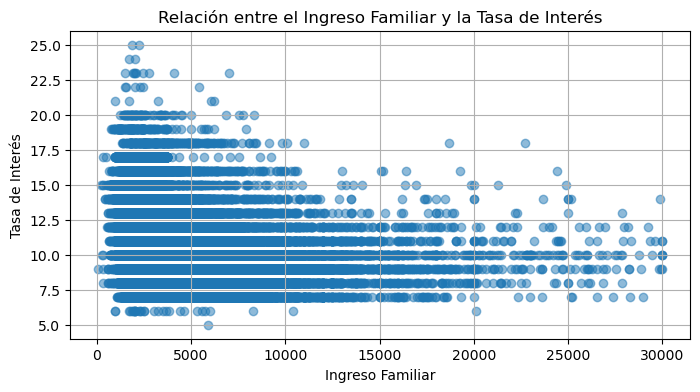

In [201]:
#Scatter Plot para Analizar la Relación entre Ingreso Familiar y Tasa de Interés
plt.figure(figsize=(8, 4))
plt.scatter(df_encoded['INGRESO_FAMILIAR'], df_encoded['TASA'], alpha=0.5)
plt.title('Relación entre el Ingreso Familiar y la Tasa de Interés')
plt.xlabel('Ingreso Familiar')
plt.ylabel('Tasa de Interés')
plt.grid(True)
plt.show()

**Relación Inversa:** Los beneficiarios con ingresos más altos parecen recibir tasas de interés más favorables. Esto podría reflejar la política de las instituciones financieras de ofrecer mejores condiciones a aquellos con menor riesgo crediticio.

**Desigualdad en Tasas para Ingresos Bajos:** Aunque la mayoría de los beneficiarios con ingresos bajos reciben tasas de interés más altas, existe una considerable variabilidad en las tasas dentro de este grupo. Esto podría indicar que no todos los beneficiarios de bajos ingresos están recibiendo las mismas oportunidades de acceder a tasas más bajas. 

In [202]:
#Correlación entre ingreso familiar y tasa de interés
correlacion_ingreso_tasa = df_encoded['INGRESO_FAMILIAR'].corr(df_encoded['TASA'])
print(f"Correlación entre Ingreso Familiar y Tasa de Interés: {correlacion_ingreso_tasa}")

Correlación entre Ingreso Familiar y Tasa de Interés: -0.3295350429486334


**Interpretación:**

El valor de -0.33 indica una relación negativa moderada entre el ingreso familiar y la tasa de interés. En otras palabras, a medida que el ingreso familiar aumenta, la tasa de interés tiende a disminuir, pero esta relación no es muy fuerte.
los beneficiarios con mayores ingresos tienden a recibir tasas de interés más bajas. Sin embargo, la correlación moderada sugiere que esta no es una relación determinante, y que otros factores también están influyendo en las tasas que se ofrecen.

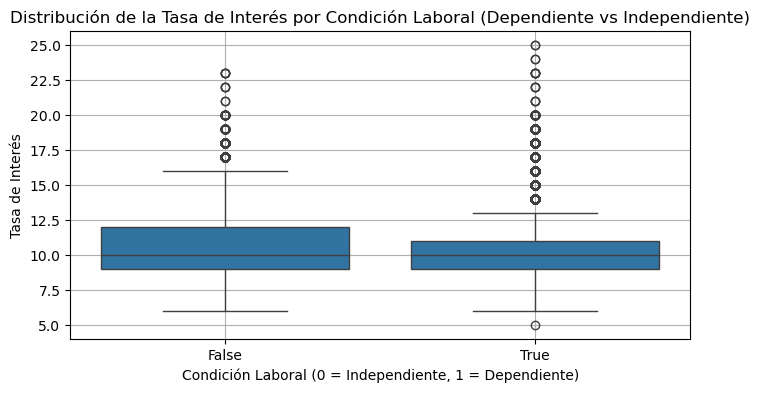

In [203]:
#Visualización con Boxplot para analizar la relacion entre la condición laboral y la tasa de interés

plt.figure(figsize=(8, 4))

# Filtrar por Condición Laboral Dependiente
sns.boxplot(x=df_encoded['CONDICION_LABORAL_Dependiente'], y=df_encoded['TASA'])
plt.title('Distribución de la Tasa de Interés por Condición Laboral (Dependiente vs Independiente)')
plt.xlabel('Condición Laboral (0 = Independiente, 1 = Dependiente)')
plt.ylabel('Tasa de Interés')
plt.grid(True)
plt.show()

La distribución de las tasas de interés para las personas con condición laboral independiente (0) y dependiente (1) muestra ciertas similitudes, con medianas y rangos intercuartílicos (cajas) bastante cercanos. Sin embargo, se observa una mayor dispersión en la distribución de las tasas de interés para los trabajadores dependientes (1), con varios valores atípicos (outliers) en el extremo superior.

In [204]:
#Aplicando prueba estadística T-Student
# Filtrar los datos según la condición laboral
tasa_dependiente = df_encoded[df_encoded['CONDICION_LABORAL_Dependiente'] == 1]['TASA']
tasa_independiente = df_encoded[df_encoded['CONDICION_LABORAL_Dependiente'] == 0]['TASA']

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(tasa_dependiente, tasa_independiente)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

Estadístico t: -36.47922252368642
Valor p: 1.5081816446606995e-289


**Interpretación prueba t-student:**

_Estadístico t (-36.48):_

El valor t negativo indica que la **tasa de interés promedio es menor para los trabajadores dependientes en comparación con los independientes.** El tamaño del valor t sugiere una diferencia bastante pronunciada entre los dos grupos.

_Valor p (1.508e-289):_

El valor p es extremadamente bajo, mucho menor que cualquier umbral común (0.05 o 0.01). Esto significa que se puede rechazar la hipótesis nula con gran confianza, **lo que indica que hay una diferencia estadísticamente significativa en las tasas de interés entre los trabajadores dependientes e independientes.**

**Conclusión:**

**En resumen, los resultados sugieren que los beneficiarios con mayores ingresos y aquellos con una condición laboral dependiente tienden a recibir tasas de interés más bajas. Sin embargo, la relación entre ingreso familiar y tasa de interés es moderada, lo que implica que otros factores adicionales también están influyendo en las condiciones crediticias. Esta complejidad sugiere la necesidad de considerar un enfoque más integral que analice múltiples variables al evaluar la asignación de tasas de interés en función del perfil del solicitante.**

### **¿Cuáles son las Instituciones Financieras Intermediarias (IFI) que ofrecen las tasas de interés más bajas a los beneficiarios del programa Mivivienda?**

**Objetivo:** Identificar las Instituciones Financieras Intermediarias (IFI) que ofrecen las tasas de interés más bajas para evaluar su contribución a la accesibilidad financiera del programa Mivivienda. Esto permitirá analizar si ciertos intermediarios financieros están desempeñando un papel clave en la facilitación del acceso a créditos con mejores condiciones, contribuyendo así a la inclusión social y económica de los beneficiarios.

In [205]:
#Calcular el Promedio de Tasa de Interés por IFI

# Crear un dataframe vacío para almacenar los promedios de tasa de interés por IFI
promedio_tasas_IFI = {}

# Lista de columnas IFI
columnas_IFI = ['IFI_BANBIF', 'IFI_Banco Pichincha', 'IFI_CMAC Huancayo', 'IFI_Continental',
                'IFI_Crédito', 'IFI_Edpyme MiCasita', 'IFI_Financiera TFC', 'IFI_Interbank', 
                'IFI_Otras', 'IFI_Scotiabank']

# Calcular el promedio de tasa de interés para cada IFI
for columna in columnas_IFI:
    # Filtrar los registros donde la IFI está presente (valor 1 en la columna)
    promedio_tasas_IFI[columna] = df_encoded[df_encoded[columna] == 1]['TASA'].mean()

# Convertir el diccionario a un DataFrame para facilitar el análisis
df_promedio_tasas_IFI = pd.DataFrame(list(promedio_tasas_IFI.items()), columns=['IFI', 'Promedio_Tasa'])

# Ordenar de menor a mayor tasa de interés
df_promedio_tasas_IFI = df_promedio_tasas_IFI.sort_values(by='Promedio_Tasa')

print(df_promedio_tasas_IFI)

                   IFI  Promedio_Tasa
4          IFI_Crédito       9.307374
7        IFI_Interbank       9.371121
3      IFI_Continental       9.488821
9       IFI_Scotiabank       9.582524
0           IFI_BANBIF       9.608877
1  IFI_Banco Pichincha       9.812211
5  IFI_Edpyme MiCasita      10.227394
2    IFI_CMAC Huancayo      12.031727
8            IFI_Otras      12.227983
6   IFI_Financiera TFC      14.263786


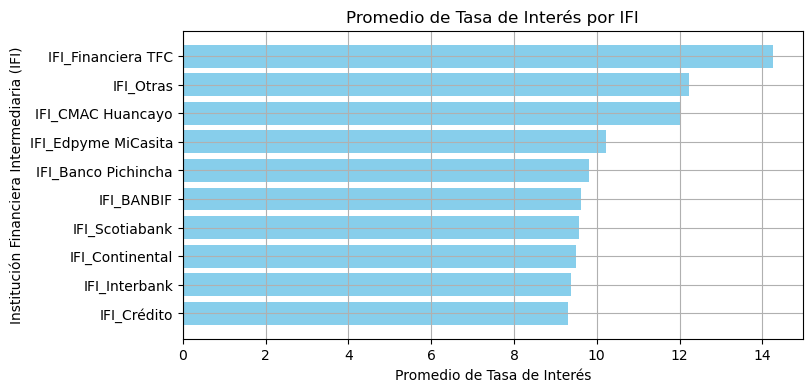

In [206]:
# Visualizando el Promedio de Tasa de Interés por IF

plt.figure(figsize=(8, 4))
plt.barh(df_promedio_tasas_IFI['IFI'], df_promedio_tasas_IFI['Promedio_Tasa'], color='skyblue')
plt.xlabel('Promedio de Tasa de Interés')
plt.ylabel('Institución Financiera Intermediaria (IFI)')
plt.title('Promedio de Tasa de Interés por IFI')
plt.grid(True)
plt.show()

In [207]:
#Aplicando prueba ANOVA

# Crear listas con las tasas de interés de cada IFI
tasas_IFI = [df_encoded[df_encoded[ifi] == 1]['TASA'] for ifi in columnas_IFI]

# Realizar la prueba ANOVA
f_stat, p_value = stats.f_oneway(*tasas_IFI)

print(f"Estadístico F: {f_stat}")
print(f"Valor p: {p_value}")

Estadístico F: 7780.332921456472
Valor p: 0.0


**Interpretación prueba ANOVA:**

**Hay una diferencia estadísticamente significativa en las tasas de interés promedio asignadas por las diferentes instituciones financieras.** En otras palabras, no todas las instituciones asignan las mismas tasas de interés promedio, y esta diferencia no se debe al azar.
Las tasas de interés varían significativamente entre las distintas IFI. Esto es consistente con lo que observamos en el gráfico, donde algunas IFI claramente ofrecen tasas más bajas que otras.

In [208]:
# Identificación de diferencias específicas con prueba Tukey
#Aplicando prueba Tukey (prueba post hoc)
# Crear una columna que identifique la IFI correspondiente para cada registro
df_encoded['IFI'] = df_encoded[columnas_IFI].idxmax(axis=1)

# Aplicar la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df_encoded['TASA'], groups=df_encoded['IFI'], alpha=0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
         IFI_BANBIF IFI_Banco Pichincha   0.2033    0.0  0.1213  0.2854   True
         IFI_BANBIF   IFI_CMAC Huancayo   2.4228    0.0   2.329  2.5167   True
         IFI_BANBIF     IFI_Continental  -0.1201 0.0003 -0.2051  -0.035   True
         IFI_BANBIF         IFI_Crédito  -0.3015    0.0 -0.3707 -0.2323   True
         IFI_BANBIF IFI_Edpyme MiCasita   0.6185    0.0  0.5272  0.7098   True
         IFI_BANBIF  IFI_Financiera TFC   4.6549    0.0  4.5546  4.7552   True
         IFI_BANBIF       IFI_Interbank  -0.2378    0.0  -0.316 -0.1595   True
         IFI_BANBIF           IFI_Otras   2.6191    0.0  2.5431  2.6951   True
         IFI_BANBIF      IFI_Scotiabank  -0.0264 0.9974 -0.1228  0.0701  False
IFI_Banco Pichincha   IFI_CMAC Huancayo   2.2195    

**Conclusiones:**

Las pruebas evidencian **desigualdad significativa en las tasas de interés** asignadas por diferentes instituciones financieras. Esto podría estar relacionado con la política interna de cada institución, su evaluación del riesgo crediticio o su enfoque en determinados segmentos de clientes. Los valores destacados muestran: 

* **IFI_Financiera TFC** se destaca como una institución que otorga **tasas de interés mucho más altas** en comparación con otras instituciones. Esto podría indicar políticas crediticias más estrictas o una mayor percepción de riesgo en sus clientes.

* **IFI_Interbank y IFI_Scotiabank** parecen ofrecer **tasas de interés más competitivas**, con diferencias significativas en comparación con instituciones que otorgan tasas más altas. Estas instituciones podrían estar adoptando políticas más favorables hacia los clientes para atraer a más solicitantes de crédito.


* **Instituciones como IFI_Edpyme MiCasita y IFI_Crédito** muestran cierta **variabilidad en las tasas** que ofrecen, lo que sugiere que pueden tener políticas más diferenciadas dependiendo del perfil del solicitante.


Estos hallazgos pueden ser útiles para los solicitantes de crédito, quienes podrían buscar instituciones que ofrezcan tasas más competitivas como IFI_Interbank o IFI_Scotiabank. Para las instituciones financieras, este análisis puede servir como una herramienta para comprender su posición en el mercado en relación con la competencia y ajustar sus políticas de tasas de interés en consecuencia.

### **¿El Programa MiVivienda ha otorgado créditos a grupos familiares cuyos ingresos están por debajo de la mediana de ingresos a nivel nacional?**

**Objetivo:**  Evaluar si el Programa MiVivienda está llegando a los grupos familiares más vulnerables económicamente, definidos como aquellos cuyos ingresos familiares se encuentran por debajo de la mediana de ingresos a nivel nacional. Este análisis busca entender el impacto del programa en la reducción de las desigualdades económicas y en la promoción de la inclusión financiera para los sectores de menores ingresos. Se utiliza como medida la mediana porque es la relacionada en la meta 10.2 del ODS 10. **Este análisis se realiza sólo sobre los créditos colocados en el 2023 que es el año del que se tiene referencia oficial de la mediana nacional.**

**Para este análisis se toma como base este estudio sobre los ingresos familiares en el Perú para el año 2023 del INEI:** https://www.inei.gob.pe/media/MenuRecursivo/publicaciones_digitales/Est/Lib0385/cap4.htm 

In [209]:
# Paso 1: Filtrar los datos para el año 2023
df_2023 = df_encoded[df_encoded['FECHA_CREDITO'].dt.year == 2023]

# Paso 2: Filtrar los datos para familias con ingresos por debajo de la mediana nacional de 2023 (2,786 soles)
mediana_nacional_2023 = 2786
df_2023_bajo_mediana = df_2023[df_2023['INGRESO_FAMILIAR'] < mediana_nacional_2023]

# Paso 3: Calcular la cantidad de créditos otorgados a familias por debajo de la mediana y la proporción
total_creditos_2023 = len(df_2023)
creditos_bajo_mediana = len(df_2023_bajo_mediana)
proporcion_bajo_mediana = (creditos_bajo_mediana / total_creditos_2023) * 100

# Mostrar los resultados
print(f"Total de créditos otorgados en 2023: {total_creditos_2023}")
print(f"Créditos otorgados a familias con ingresos por debajo de la mediana nacional: {creditos_bajo_mediana}")
print(f"Proporción de créditos otorgados a familias con ingresos por debajo de la mediana nacional: {proporcion_bajo_mediana:.2f}%")

Total de créditos otorgados en 2023: 11375
Créditos otorgados a familias con ingresos por debajo de la mediana nacional: 1478
Proporción de créditos otorgados a familias con ingresos por debajo de la mediana nacional: 12.99%


**Conclusión:**

**Sí, el Programa MiVivienda ha otorgado créditos a personas con ingresos por debajo de la mediana nacional**. En 2023, el 12.99% de los créditos fueron asignados a este grupo. Aunque esto refleja un avance, sigue existiendo una brecha. Desde el programa, se puede desarrollar en un **scoring de impacto social, que permita visualizar y monitorear el impacto de los créditos en la reducción de desigualdades, facilitando una mejor focalización de los recursos hacia los sectores más vulnerables.**

### **¿Cúales son las características de las personas a las que se les ha asignado créditos con ingresos por debajo de la mediana durante el año 2023?**

**Objetivo:**  Identificar y analizar las características sociodemográficas de las personas a las que se les ha asignado créditos del Programa MiVivienda durante el año 2023, cuyos ingresos se encuentran por debajo de la mediana nacional. 

In [210]:
# Análisis de características de los 1,478 créditos
df_bajo_mediana = df_2023_bajo_mediana.copy()  # Copia del DataFrame filtrado para trabajar

# Paso 1: Distribución de la Condición Laboral
condicion_laboral = df_bajo_mediana[['CONDICION_LABORAL_Dependiente', 'CONDICION_LABORAL_Independiente']].sum()

# Paso 2: Distribución de la Edad (Agrupación por rangos de edad)
df_bajo_mediana['Rango_Edad'] = pd.cut(df_bajo_mediana['EDAD'], bins=[18, 27, 37, 47, 57, 67, 77, 88], 
                                       labels=['18-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-88'], right=False)
edad_distribucion = df_bajo_mediana['Rango_Edad'].value_counts()

# Paso 3: Distribución de Género
genero_distribucion = df_bajo_mediana[['GENERO_M', 'GENERO_F']].sum()

# Paso 4: Distribución de IFI
ifi_distribucion = df_bajo_mediana['IFI'].value_counts()

# Mostrar los resultados
print("Distribución por Condición Laboral:")
print(condicion_laboral)
print("\nDistribución por Rango de Edad:")
print(edad_distribucion)
print("\nDistribución por Género:")
print(genero_distribucion)
print("\nDistribución por IFI:")
print(ifi_distribucion)

Distribución por Condición Laboral:
CONDICION_LABORAL_Dependiente      1326
CONDICION_LABORAL_Independiente     152
dtype: int64

Distribución por Rango de Edad:
Rango_Edad
28-37    673
18-27    318
38-47    290
48-57    154
58-67     42
68-77      1
78-88      0
Name: count, dtype: int64

Distribución por Género:
GENERO_M    713
GENERO_F    765
dtype: int64

Distribución por IFI:
IFI
IFI_Otras              602
IFI_Continental        339
IFI_Edpyme MiCasita    133
IFI_CMAC Huancayo      121
IFI_Banco Pichincha    115
IFI_Crédito             65
IFI_Interbank           63
IFI_BANBIF              24
IFI_Scotiabank          16
Name: count, dtype: int64


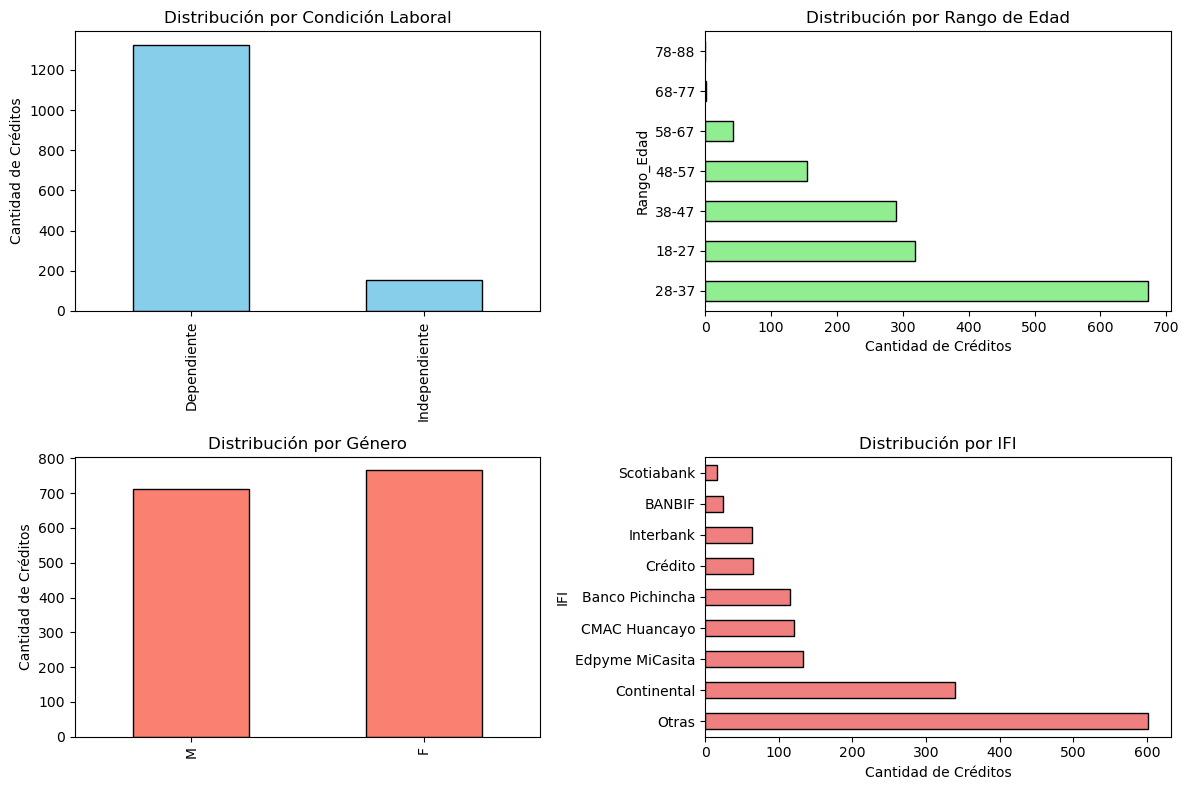

In [211]:
# Visualización de las características en la asignación de los créditos a personas con ingresos por debajo de la mediana Nacional durante el 2023

# Renombrar las etiquetas para quitar los prefijos
condicion_laboral.index = condicion_laboral.index.str.replace('CONDICION_LABORAL_', '')
genero_distribucion.index = genero_distribucion.index.str.replace('GENERO_', '')
ifi_distribucion.index = ifi_distribucion.index.str.replace('IFI_', '')

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Gráfico 1: Distribución por Condición Laboral
plt.subplot(2, 2, 1)
condicion_laboral.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución por Condición Laboral')
plt.ylabel('Cantidad de Créditos')

# Gráfico 2: Distribución por Rango de Edad
plt.subplot(2, 2, 2)
edad_distribucion.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Distribución por Rango de Edad')
plt.xlabel('Cantidad de Créditos')

# Gráfico 3: Distribución por Género
plt.subplot(2, 2, 3)
genero_distribucion.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribución por Género')
plt.ylabel('Cantidad de Créditos')

# Gráfico 4: Distribución por IFI
plt.subplot(2, 2, 4)
ifi_distribucion.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Distribución por IFI')
plt.xlabel('Cantidad de Créditos')

# Ajustar el layout
plt.tight_layout()
plt.show()

**Conclusión:**

Las características más frecuentes de las personas que recibieron créditos del Programa Mivivienda en 2023 con ingresos por debajo de la mediana nacional son: 89.7% tienen condición laboral dependiente, 51.7% son mujeres (con una diferencia mínima (52 créditos más) respecto a los hombres), la mayoría están en el rango de 28 a 37 años, y el 40.7% de los créditos fueron otorgados por IFI categorizadas como 'Otras'. 

## **Tercera parte: Evaluación del Impacto Social mediante Modelado Predictivo**

En esta sección se desarrollará un modelo predictivo cuyo objetivo es evaluar el impacto social del programa de créditos. El enfoque principal será definir un scoring que mida este impacto en términos de reducción de desigualdades, basándose en variables clave como el ingreso familiar, la condición laboral y la tasa de interés recibida por los beneficiarios.

Para optimizar el rendimiento del modelo y asegurar que las predicciones estén alineadas con las condiciones económicas más actuales, **el algoritmo será entrenado únicamente con los datos correspondientes a los años 2023 y 2024**. Este enfoque se justifica debido a que los ingresos familiares por debajo de la mediana nacional, utilizados como referencia, están basados en datos de ingresos del 2023, lo que garantiza que las predicciones reflejen fielmente el contexto económico actual. Al limitar el modelo a los datos más recientes, se busca evitar que patrones desactualizados distorsionen las predicciones, permitiendo que el modelo capte mejor las tendencias actuales de inclusión financiera.

### **¿Cómo definir un scoring que mida el impacto social del programa, considerando variables que contribuyan a la reducción de las brechas sociales?**

**Objetivo:** Desarrollar un sistema de Scoring de Impacto Social que, a partir del análisis de variables como la condición laboral, los ingresos familiares y la tasa de interés, evalúe la contribución de los créditos otorgados en la reducción de las desigualdades sociales, priorizando la inclusión de grupos vulnerables y facilitando la toma de decisiones para promover la equidad económica y social.

Tradicionalmente, los préstamos son asignados por entidades financieras a través de un **credit scoring**, el cual utiliza algoritmos para evaluar el riesgo crediticio de un solicitante. Este sistema considera variables personales, laborales y económicas, tales como:

* Información personal: Edad, estado civil o situación familiar.

* Información laboral: Profesión, antigüedad en la empresa o tipo de contrato.

* Información económica y financiera: Ingresos, gastos, patrimonio, inversiones y saldos de cuentas o productos bancarios contratados.

* Historial crediticio: Características de préstamos vigentes o pasados, incluyendo importe, cuotas y cumplimiento de plazos.

**Fuente:** Santander Consumer: https://www.santanderconsumer.es/blog/post/scoring-bancario-que-es-y-por-que-influye-en-los-prestamos

El **Scoring de Impacto Social** _(**Social Impact Scoring**)_, propuesto en este proyecto, tiene como **objetivo, medir cómo los créditos otorgados por instituciones que promueven la mejora de la calidad de vida de la población impactan positivamente en la reducción de las brechas sociales y económicas.** Este algoritmo permite evaluar la inclusión financiera y el acceso a recursos para los más vulnerables, utilizando variables clave como:

* Condición laboral: Considera el impacto de la condición laboral (**independiente o informal**) en el acceso a créditos y el beneficio social generado, reconociendo que los trabajadores independientes suelen enfrentar mayores barreras en los sistemas tradicionales.

* Ingresos familiares: Compara los ingresos de los solicitantes con la **la mediana nacional**;  de este modo, se evalúa cómo el crédito contribuye a mejorar la calidad de vida de familias con ingresos por debajo de estos umbrales y que es definido como clave dentro de indicadores del ODS 10. 

* Tasa de interés: Evalúa la accesibilidad financiera a través de la tasa de interés ofrecida. **Tasas más bajas** indican un mayor acceso al crédito, lo que favorece a los sectores más vulnerables al disminuir su carga financiera y aumentar su capacidad para mejorar sus condiciones de vida.

**_Social Impact Scoring_ es una herramienta diseñada para cuantificar el impacto positivo de los programas de crédito en la reducción de las desigualdades. Permite a las instituciones medir de qué manera sus recursos benefician a los sectores vulnerables, facilitando la focalización de esfuerzos hacia un impacto social cuantificable y demostrable. Este algoritmo no pretende reemplazar las mediciones tradicionales utilizadas para la asignación de créditos, sino complementarlas como una medida a implementar después de la colocación del crédito. Además, puede convertirse en un instrumento clave para orientar nuevas focalizaciones institucionales y apoyar en la definición de políticas que contribuyan a reducir las brechas sociales.**

* **Construcción de la variable objetivo (Target):**

In [212]:
# Filtrar los datos para los años 2023 y 2024
df_2023_2024 = df_encoded[df_encoded['FECHA_CREDITO'].dt.year.isin([2023, 2024])].copy()

# Verificar que el DataFrame contenga las columnas codificadas correctamente
df_2023_2024.head()

,FECHA_CREDITO,UBIGEO,INGRESO_FAMILIAR,EDAD,TASA,PLAZOS,PRESTAMO,VIVIENDA,FECHA_CORTE,AÑO_CREDITO,...,IFI_Continental,IFI_Crédito,IFI_Edpyme MiCasita,IFI_Financiera TFC,IFI_Interbank,IFI_Otras,IFI_Scotiabank,DIFERENCIA,Rango_Plazos,IFI
90944,2023-01-31,150110,4247.0,53,9.0,180,148200.00,198200.0,2024-06-26,2023,...,False,False,True,False,False,False,False,50000.00,10-15 años,IFI_Edpyme MiCasita
90945,2023-01-27,150115,10500.0,30,9.0,300,365414.00,424900.0,2024-06-26,2023,...,False,False,False,False,False,False,False,59486.00,20-25 años,IFI_BANBIF
90946,2023-01-31,150108,7000.0,53,9.0,240,278613.91,342150.0,2024-06-26,2023,...,False,False,False,False,True,False,False,63536.09,15-20 años,IFI_Interbank
90947,2023-01-31,70102,6750.0,48,9.0,240,263489.15,329676.0,2024-06-26,2023,...,False,False,False,False,True,False,False,66186.85,15-20 años,IFI_Interbank
90948,2023-01-31,150128,6500.0,55,9.0,240,277560.00,308400.0,2024-06-26,2023,...,False,True,False,False,False,False,False,30840.00,15-20 años,IFI_Crédito


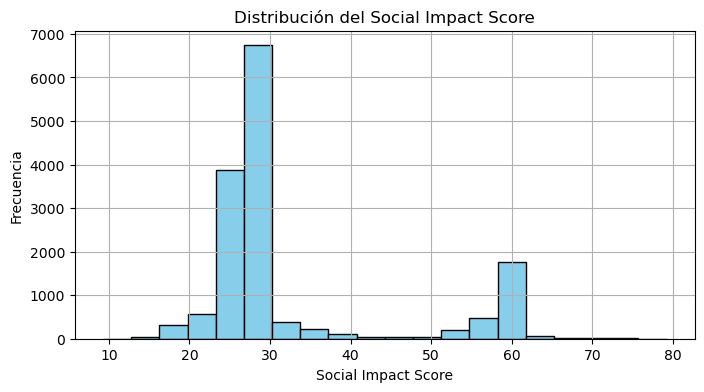

In [213]:
# Creando la variable para calcular el Social impact Scoring

# Paso 1: Normalización e inversión de la Tasa de Interés (0.05 - 0.25)
df_2023_2024['TASA_norm'] = (df_2023_2024['TASA'] - df_2023_2024['TASA'].min()) / (df_2023_2024['TASA'].max() - df_2023_2024['TASA'].min())
df_2023_2024['TASA_norm_invertida'] = 1 - df_2023_2024['TASA_norm']  # Se invierte la normalización para que menores tasas tengan mayor impacto

# Paso 2: Normalización de la Condición Laboral
# Se le da más peso a los independientes, considerando solo a los independientes para el mayor impacto social
df_2023_2024['CONDICION_LABORAL_Combinada'] = df_2023_2024['CONDICION_LABORAL_Independiente']

# Paso 3: Mediana de los ingresos familiares (definida manualmente)
mediana_ingresos = 2786

# Clasificación de los ingresos: por debajo de la mediana tendrá mayor impacto, por encima, menor impacto
df_2023_2024['INGRESO_FAMILIAR_norm'] = np.where(
    df_2023_2024['INGRESO_FAMILIAR'] < mediana_ingresos,
    1 - (df_2023_2024['INGRESO_FAMILIAR'] / mediana_ingresos),  # Se invierte la escala para que menores ingresos tengan mayor impacto
    0  # Ingresos por encima de la mediana tendrán impacto 0 en esta variable
)

# Paso 4: Calculo del Social Impact Scoring con un rango de 0 a 100
# Se aplican ponderaciones igualitarias como punto de partida
ponderacion_tasa = 1/3
ponderacion_condicion_laboral = 1/3
ponderacion_ingresos_familiares = 1/3

df_2023_2024['Social_Impact_Score'] = (
    ponderacion_tasa * df_2023_2024['TASA_norm_invertida'] +
    ponderacion_condicion_laboral * df_2023_2024['CONDICION_LABORAL_Combinada'] +
    ponderacion_ingresos_familiares * df_2023_2024['INGRESO_FAMILIAR_norm']
) * 100  # Se escala el puntaje final a una escala de 0 a 100

# Paso 5: Visualización de la distribución del Social Impact Score
plt.figure(figsize=(8, 4))
plt.hist(df_2023_2024['Social_Impact_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Social Impact Score')
plt.xlabel('Social Impact Score')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Interpretación de la escala:**

_El Social Impact Scoring_ es un valor numérico en una escala de 0 a 100, donde los puntajes más altos indican un mayor impacto social. Los rangos de interpretación son los siguientes:

* 0 - 30: **Bajo impacto social.**
* 31 - 60: **Moderado impacto social.**
* 61 - 100: **Alto impacto social.**

**Flexibilidad en la Interpretación del Scoring:**

El Social Impact Scoring se presenta como una escala numérica continua que va de 0 a 100, donde los puntajes más altos indican un mayor impacto social. Los umbrales propuestos (bajo, moderado, alto impacto) son **sugerencias interpretativas** que sirven como punto de referencia para entender la distribución de los puntajes. Sin embargo, **la definición de estos límites queda abierta para que cada institución ajuste los valores según sus propios criterios y necesidades.**

Esto ofrece la flexibilidad necesaria para adaptar el scoring a distintos contextos, permitiendo a las instituciones personalizar las decisiones en función de sus prioridades y del impacto social que desean maximizar. El algoritmo no pretende imponer un enfoque único, sino proporcionar una herramienta que facilite la toma de decisiones y promueva la inclusión social y económica de manera ajustada a las realidades de cada entorno.

**Distribución del Social Impact Score para el caso del Dataset del Fondo MIVIVIENDA:**


**Concentración en Puntajes Bajos (00 - 30):**

La mayor parte de los casos se encuentra en el rango de 20 a 40, lo que sugiere que la mayoría de los individuos en el dataset tienen un impacto social moderadamente bajo. Esto podría deberse a que muchos de los individuos en el dataset no cumplen con todos los criterios para un alto impacto social, como tener ingresos por debajo de la mediana o una condición laboral independiente.

**Cola Hacia la Derecha (Puntajes Más Altos):**

Aunque menos frecuente, hay una cantidad significativa de individuos con puntajes entre 31 y 60, lo que representa un impacto social moderado a alto. Estos casos probablemente corresponden a individuos con ingresos más bajos y condiciones laborales independientes, o aquellos que reciben tasas de interés más favorables.

**Falta de Puntajes Extremadamente Altos (>60):**

No hay muchos casos de crédiros colocados con puntajes extremadamente altos (más de 60), lo que indica que es poco común que alguien cumpla con todas las condiciones que maximicen el impacto social.

* **Pruebas de verificación de asignación correcta del Scoring:**

In [214]:
# Seleccionar una muestra aleatoria de 10 registros para verificación manual
muestra_aleatoria = df_2023_2024.sample(n=5, random_state=42)

# Mostrar los valores relevantes para verificar el cálculo del Social Impact Scoring
# Incluimos las variables TASA_norm_invertida, CONDICION_LABORAL_Combinada, INGRESO_FAMILIAR_norm y el Social_Impact_Score calculado
muestra_aleatoria = muestra_aleatoria[['TASA_norm_invertida', 'CONDICION_LABORAL_Combinada', 'INGRESO_FAMILIAR_norm', 'Social_Impact_Score']]

# Mostrar la muestra seleccionada
print(muestra_aleatoria)

# Verificar los segmentos de clasificación para cada registro
def clasificacion_social_impact_score(score):
    if score <= 30:
        return 'Bajo Impacto Social'
    elif score <= 60:
        return 'Moderado Impacto Social'
    else:
        return 'Alto Impacto Social'

# Aplicar la función de clasificación
muestra_aleatoria['Clasificación'] = muestra_aleatoria['Social_Impact_Score'].apply(clasificacion_social_impact_score)

# Mostrar la tabla con la clasificación
print(muestra_aleatoria)

        TASA_norm_invertida  CONDICION_LABORAL_Combinada  \
99640              0.833333                         True   
105335             0.777778                        False   
97649              0.833333                        False   
103691             0.833333                         True   
93498              0.833333                        False   

        INGRESO_FAMILIAR_norm  Social_Impact_Score  
99640                 0.00000            61.111111  
105335                0.00000            25.925926  
97649                 0.00000            27.777778  
103691                0.00000            61.111111  
93498                 0.27028            36.787110  
        TASA_norm_invertida  CONDICION_LABORAL_Combinada  \
99640              0.833333                         True   
105335             0.777778                        False   
97649              0.833333                        False   
103691             0.833333                         True   
93498              0.

In [215]:
# Seleccionar algunas columnas originales y sus versiones normalizadas para la verificación
# En este caso, las columnas de TASA y TASA_norm_invertida, así como INGRESO_FAMILIAR y su versión normalizada
muestra_verificacion = df_2023_2024[['TASA', 'TASA_norm_invertida', 'INGRESO_FAMILIAR', 'INGRESO_FAMILIAR_norm']].sample(n=10, random_state=42)

# Mostrar los valores originales y normalizados lado a lado
print(muestra_verificacion)

        TASA  TASA_norm_invertida  INGRESO_FAMILIAR  INGRESO_FAMILIAR_norm
99640    9.0             0.833333            5000.0                0.00000
105335  10.0             0.777778            3086.0                0.00000
97649    9.0             0.833333           10009.0                0.00000
103691   9.0             0.833333            7500.0                0.00000
93498    9.0             0.833333            2033.0                0.27028
102008  10.0             0.777778            4000.0                0.00000
104431   9.0             0.833333            5000.0                0.00000
93563   10.0             0.777778            5000.0                0.00000
94045   10.0             0.777778           11150.0                0.00000
95979   14.0             0.555556            2990.0                0.00000


**Las pruebas aplicadas en muestras aleatorias muestran que la clasificación sigue la lógica aplicada en el Scoring**

### **Entrenamiento del modelado predictivo del Social Impact Scoring**

### Justificación del modelo elegido: **Random Forest**

A continuación se presentan las razones clave por las que se ha seleccionado Random Forest para este proyecto:

* **Capacidad para manejar interacciones complejas:** Este modelo puede capturar interacciones no lineales y complejas entre las variables, lo cual es esencial cuando se consideran múltiples factores, como la condición laboral, los ingresos familiares y la tasa de interés, que interactúan de manera no trivial para influir en el impacto social. Es ideal cuando las relaciones entre las variables y el objetivo no son directas ni lineales, permitiendo que el modelo capture y explote estas interacciones complejas para mejorar la precisión de las predicciones.

* **Interpretabilidad:** Random Forest ofrece métodos para medir la importancia de cada variable, lo que permite interpretar qué factores están contribuyendo más al Social Impact Scoring, lo cual es importante para proporcionar transparencia en la toma de decisiones.

* **Escalabilidad:** Random Forest es eficiente al manejar grandes volúmenes de datos, lo cual es necesario para analizar los datos históricos de créditos del Fondo MiVIVIENDA y evaluar su impacto social en un contexto más amplio.

* **Entrenamiento y Evaluación del Modelo de Regresión con Random Forest**

In [216]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Definir las características (features) y la variable objetivo (target) utilizando el DataFrame df_2023_2024
X = df_2023_2024[['TASA', 'CONDICION_LABORAL_Independiente', 'INGRESO_FAMILIAR']]
y = df_2023_2024['Social_Impact_Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Error Cuadrático Medio (MSE) en el conjunto de prueba:", mse_rf)

# Validación cruzada
scores_rf = cross_val_score(modelo_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Puntuaciones de validación cruzada (MSE):", -scores_rf)
print("Media de validación cruzada (MSE):", -scores_rf.mean())

Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.01936577651103966
Puntuaciones de validación cruzada (MSE): [0.13700963 0.17930049 0.04431837 0.0181181  0.01793319]
Media de validación cruzada (MSE): 0.07933595635864607


**Interpretación de los resultados:**

**Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.0194**, lo que indica un error promedio bajo en las predicciones del modelo. Esto sugiere que el Random Forest es capaz de capturar de manera razonable las relaciones entre las características clave (tasa de interés, condición laboral e ingresos familiares) y el Social Impact Score en el contexto actual de 2023 y 2024. Aunque el error no es insignificante, sigue siendo lo suficientemente bajo como para considerar que el modelo es útil en la predicción del impacto social.

**Puntuaciones de validación cruzada (MSE): La media de las puntuaciones en la validación cruzada es de 0.0793**. Este valor refleja cierta variabilidad en la capacidad del modelo para generalizar en diferentes subconjuntos de los datos. Las puntuaciones individuales varían, desde 0.0179 hasta 0.1793, lo que indica que el modelo es sensible a la segmentación de los datos. Esto puede deberse a la cantidad de datos disponibles y a la variabilidad inherente en los datos de 2023 y 2024.

**Conclusión:** El modelo entrenado exclusivamente con los datos más recientes de 2023 y 2024 proporciona una estimación relevante del impacto social de los créditos en el contexto actual. Si bien presenta un margen de error que puede ser optimizado, su capacidad para capturar las relaciones clave dentro del conjunto de datos actual lo convierte en una herramienta valiosa para evaluar y predecir el impacto social en un entorno específico y contemporáneo.

* **Optimización del modelo con selección de hiperparámetros**

In [217]:
# Búsqueda Inicial con Rango Reducido Fase 1 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir las características (features) y la variable objetivo (target) utilizando el DataFrame df_2023_2024
X = df_2023_2024[['TASA', 'CONDICION_LABORAL_Independiente', 'INGRESO_FAMILIAR']]
y = df_2023_2024['Social_Impact_Score']

# Fase 1: Búsqueda inicial con un rango reducido de hiperparámetros
param_grid_fase1 = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear el modelo de Random Forest
modelo_rf_fase1 = RandomForestRegressor(random_state=42)

# Configurar el Grid Search con validación cruzada de 3 pliegues
grid_search_fase1 = GridSearchCV(estimator=modelo_rf_fase1, param_grid=param_grid_fase1, 
                                 cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros (Fase 1)
grid_search_fase1.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados en la Fase 1
print("Mejores Hiperparámetros Encontrados en la Fase 1:", grid_search_fase1.best_params_)

# Guardar el mejor modelo para la siguiente fase
mejor_modelo_rf_fase1 = grid_search_fase1.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Mejores Hiperparámetros Encontrados en la Fase 1: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


**Resultados de la Fase 1 de Optimización de Hiperparámetros:**

En la Fase 1 de la optimización del modelo con Random Forest, se realizó una búsqueda inicial utilizando un rango reducido de hiperparámetros. Tras evaluar 48 combinaciones posibles, los mejores hiperparámetros encontrados fueron:

* max_depth: 20
El modelo profundiza hasta 20 niveles en cada árbol, lo que permite capturar relaciones complejas en los datos sin sobreajustar en exceso.

* min_samples_leaf: 1
Cada hoja en el árbol de decisión puede contener al menos una muestra, lo que permite al modelo capturar todos los detalles en los datos.

* min_samples_split: 2
Para dividir un nodo, se requieren al menos 2 muestras, lo que permite que el modelo genere divisiones detalladas.

* n_estimators: 150
Se seleccionaron 150 árboles en el bosque, lo que ayuda a mejorar la estabilidad y precisión del modelo al promediar los resultados de múltiples árboles.

**Estos resultados proporcionan una base sólida para refinar aún más el modelo en la siguiente fase de optimización, permitiendo ajustes adicionales para maximizar el rendimiento.**

In [218]:
from sklearn.model_selection import RandomizedSearchCV

# Fase 2: Búsqueda afinada basada en los resultados de la Fase 1 utilizando RandomizedSearchCV
param_grid_fase2 = {
    'n_estimators': [90, 100, 110],
    'max_depth': [18, 20, 22],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Configurar el Randomized Search para la Fase 2
random_search_fase2 = RandomizedSearchCV(estimator=mejor_modelo_rf_fase1, param_distributions=param_grid_fase2, 
                                         n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

# Ejecutar la búsqueda de hiperparámetros (Fase 2)
random_search_fase2.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados en la Fase 2
print("Mejores Hiperparámetros Encontrados en la Fase 2:", random_search_fase2.best_params_)

# Evaluar el modelo optimizado en el conjunto de prueba
mejor_modelo_rf_fase2 = random_search_fase2.best_estimator_
y_pred_rf_optimizado_fase2 = mejor_modelo_rf_fase2.predict(X_test)
mse_rf_optimizado_fase2 = mean_squared_error(y_test, y_pred_rf_optimizado_fase2)
print("Error Cuadrático Medio (MSE) del modelo optimizado en el conjunto de prueba:", mse_rf_optimizado_fase2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores Hiperparámetros Encontrados en la Fase 2: {'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Error Cuadrático Medio (MSE) del modelo optimizado en el conjunto de prueba: 0.001781619735793223


**Resultados de la Fase 2 de Optimización de Hiperparámetros:**

Estos hiperparámetros son consistentes con los obtenidos en la fase anterior, con ligeras afinaciones, lo que confirma que el modelo ha encontrado una configuración estable y eficaz para predecir el Social Impact Score. **Este resultado sugiere que el modelo de Random Forest optimizado es altamente confiable para la tarea de medir el impacto social, proporcionando una herramienta robusta para apoyar la toma de decisiones basada en datos.**

### **Validación y Evaluación del Modelo: Métricas de Rendimiento**

* **SHAP: Shapley Additive Explanations**

**Contextualización:** Su aplicación permite entender cómo cada característica influye en una predicción específica y también ver el impacto promedio de las características en el modelo en general. 

(149, 3) (149,)


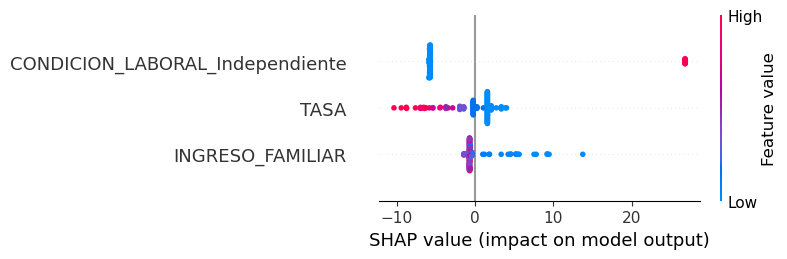

In [219]:
# Aplicando SHAP

import shap

# Definir un tamaño de muestra del 5%
sample_size = 0.05

# Seleccionar una muestra aleatoria del 5% de los registros de X_test
X_test_sample = X_test.sample(frac=sample_size, random_state=42)

# Seleccionar los valores correspondientes de la variable objetivo y_test
y_test_sample = y_test.loc[X_test_sample.index]

# Confirmar el tamaño de la muestra seleccionada
print(X_test_sample.shape, y_test_sample.shape)

# Crear el explicador SHAP para el modelo optimizado
explainer = shap.TreeExplainer(mejor_modelo_rf_fase2)

# Calcular los valores SHAP para la muestra seleccionada
shap_values = explainer.shap_values(X_test_sample)

# Visualizar la importancia global de las características usando un resumen de gráfico SHAP
shap.summary_plot(shap_values, X_test_sample)

**Interpretación de la prueba SHAP:**

El gráfico SHAP muestra el impacto de cada característica en las predicciones del modelo de Random Forest para el Social Impact Scoring. Los puntos representan instancias de datos, y el color indica el valor de la característica (azul para valores bajos, rosa para valores altos). El eje X representa el valor SHAP, que indica cuánto contribuye la característica a la predicción.

**Los resultados de SHAP confirman que las tres variables seleccionadas influyen significativamente en el Social Impact Scoring, y las direcciones de sus impactos son coherentes con las expectativas iniciales del modelo. La condición laboral independiente es el principal impulsor del impacto social positivo, con un efecto significativo tanto en valores altos como bajos de la variable. Además, los ingresos familiares muestran un impacto relevante en las predicciones, reflejando su importancia en la determinación del impacto social, mientras que la tasa de interés también contribuye, aunque con menor variabilidad.**

* **Error cuadrático medio y Coeficiente de determinación**

**Contextualización:** Estas dos métricas proporcionan una evaluación integral del rendimiento del modelo: el MSE se enfoca en la precisión de las predicciones, mientras que el R² evalúa la capacidad del modelo para explicar la variabilidad de los datos. 

In [220]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluación en el conjunto de prueba
y_pred_final = mejor_modelo_rf_fase2.predict(X_test)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Error Cuadrático Medio (MSE) en el conjunto de prueba:", mse_final)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_final)

Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.001781619735793223
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9999892614064635


**Interpretación de Resultados:**

* El Error Cuadrático Medio (MSE) en el conjunto de prueba es de 0.00178, lo que indica que el error promedio en las predicciones del modelo es bajo. Esto significa que las predicciones del modelo están muy cerca de los valores reales, lo que refleja una alta precisión en la estimación del Social Impact Score.

* El R² en el conjunto de prueba es  0.999989, lo cual sugiere que el modelo es capaz de explicar casi el 100% de la variabilidad en los datos. Esto indica que el modelo ajusta los datos de manera excepcional y tiene un poder explicativo muy alto, capturando prácticamente todas las relaciones subyacentes entre las características y el Social Impact Scoring.

* **Comparación de Predicciones y Valores Reales:**

In [221]:
# Generar las predicciones para el conjunto de prueba
y_pred_rf_optimizado_fase2 = mejor_modelo_rf_fase2.predict(X_test)

# Crear un DataFrame para comparar las primeras 10 predicciones frente a los valores reales
resultado_comparacion = pd.DataFrame({
    'Valores Reales': y_test[:10].values,  # Usamos .values para asegurar que se mantenga el formato correcto
    'Valores Predichos': y_pred_rf_optimizado_fase2[:10]
})

# Mostrar la comparación de los primeros 10 resultados
print("Comparación de los primeros 10 resultados:")
print(resultado_comparacion)

Comparación de los primeros 10 resultados:
   Valores Reales  Valores Predichos
0       61.111111          61.111111
1       25.925926          25.925926
2       27.777778          27.777778
3       61.111111          61.111111
4       36.787110          36.797139
5       59.259259          59.259259
6       27.777778          27.777778
7       25.925926          25.925926
8       25.925926          25.925926
9       18.518519          18.518519


**Interpretación:**

* La comparación muestra que el modelo está realizando predicciones muy precisas, con errores mínimos o inexistentes en los primeros 10 casos evaluados. Esto coincide con los resultados previos de MSE bajo y R² cercano a 1.

* El modelo parece estar generalizando muy bien en estos casos de prueba, lo que es una buena señal de que seguirá teniendo un buen rendimiento en datos futuros. Pero se continua evaluando la posibilidad de un sobreajuste. 

* **Comparación de Predicciones y Valores Reales:**

**Contextualización:** La visualización de residuos vs. predicciones es una herramienta crucial en la evaluación de modelos de regresión. Esta técnica permite analizar la diferencia entre los valores predichos por el modelo y los valores reales observados, conocidos como residuos. Un modelo ideal debería mostrar residuos distribuidos de manera aleatoria alrededor de cero, sin patrones discernibles. Es una técnica indispensable para diagnosticar el rendimiento del modelo y garantizar que está realizando predicciones robustas sin caer en el sobreajuste o subajuste.

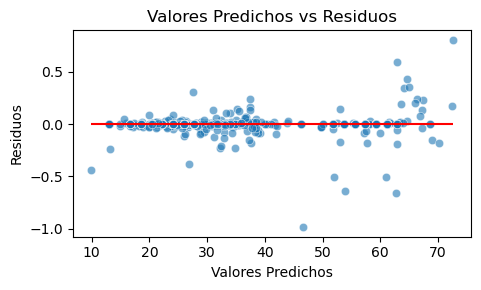

In [222]:
# Calcular los residuos
residuos = y_test - y_pred_rf_optimizado_fase2

# Gráfico de residuos
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_pred_rf_optimizado_fase2, y=residuos, alpha=0.6)
plt.hlines(y=0, xmin=min(y_pred_rf_optimizado_fase2), xmax=max(y_pred_rf_optimizado_fase2), color='red')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Valores Predichos vs Residuos')

plt.tight_layout()
plt.show()

**Intrepretación:**

El gráfico sugiere que el modelo está realizando predicciones consistentes y que **no hay indicios claros de sobreajuste o subajuste**. La distribución aleatoria de los residuos alrededor de 0 es un signo positivo de que el modelo generaliza bien en los datos.

## **Cuarta parte: Conclusiones y recomendaciones**

* El Social Impact Scoring (SIS) se ha diseñado para priorizar a los grupos más vulnerables, garantizando que reciban apoyo adicional. Este enfoque busca promover la equidad, asegurando que los recursos se distribuyan de manera que se aborden las desigualdades existentes, en lugar de aplicar una igualdad uniforme que podría no atender adecuadamente las necesidades de los grupos más desfavorecidos.

* Aunque el enfoque del SIS es intencional en su búsqueda de equidad, se recomienda que, en caso de implementarse, el modelo sea monitoreado y evaluado continuamente para garantizar que las decisiones tomadas sigan alineadas con los objetivos sociales a largo plazo. Este monitoreo es crucial para evitar que, inadvertidamente, se perpetúen dinámicas discriminatorias o se generen efectos no deseados.

* Si bien el análisis sugiere que tasas de interés más bajas, junto con condiciones laborales desfavorables y acceso a créditos para familias de menores ingresos, pueden tener un impacto positivo en la inclusión social, este estudio no incluye datos sobre el comportamiento de pago de los beneficiarios del programa. Recomiendo que futuras investigaciones aborden este aspecto crítico, ya que una comprensión más profunda de cómo las tasas de interés y la capacidad de ingresos influyen en la capacidad de pago permitiría diseñar políticas más efectivas y justas, orientadas a reducir las brechas económicas y sociales.

* Se recomienda continuar la investigación para evaluar si el acceso a la vivienda en las condiciones propuestas efectivamente contribuye a la reducción de las brechas sociales y al mejoramiento de la calidad de vida de las personas. Este seguimiento permitiría ajustar las políticas y estrategias para maximizar su impacto social.

* El SIS puede establecerse como un modelo base para la medición cuantitativa del impacto en diversos programas sociales. A futuro, este modelo podría evolucionar hacia una herramienta más robusta y compleja, integrando variables adicionales y datos más amplios que vayan más allá del conjunto de datos analizado en este proyecto.